# Análisis de la siniestralidad en accidentes de automóviles

 <ul>
<li> Autores: Pablo Carretero Collado y Ramón Guerrero Morales</li>
<li> Fecha: 16/12/2021</li>
<li> Email: pablo.carretero@cunef.edu y ramon.guerrero@cunef.edu</li>
<li> Centro: CUNEF Universidad</li>    
</ul>

El objetivo de este proyecto es predecir si en un accidente de carretera, dada unas características, se va a producir algún fallecimiento, para que, como aseguradora, se pueda calcular la provisión necesaria.

 Para poder conseguirlo, primero se analizará el conjunto de datos, para poder obtener un conocimiento del área, y posteriormente, realizar una predicción mediante distintos modelos.

Los pasos a seguir en este trabajo son:
<ul>
<li> Diccionario</li>
<li> Lectura de los datos</li>
<li> Análisis exploratorio de los datos para obtener información sobre el conjunto de dato.</li>
<li> Selección de las variables a través del diccionario de datos y del análisis exploratorio) para después eliminarlas.</li>
<li> Modelos predictivos y optimización de hiperparámetros</li>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.impute import SimpleImputer
import category_encoders as ce
from category_encoders import TargetEncoder
import warnings
from imblearn.under_sampling import NearMiss
warnings.filterwarnings("ignore")
from numpy import where
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
import plotly.graph_objects as go
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from IPython import display

# Diccionario de los datos

Para hacer un mejor análisis, estudiaremos las variables de nuestro dataset para ver que información aporta cada una.

## Variables temporales

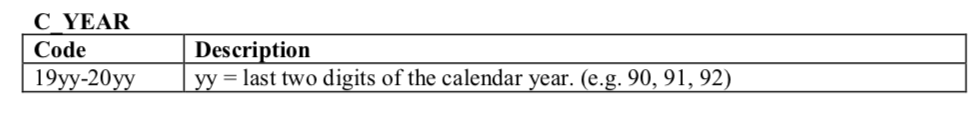

In [96]:
# C_YEAR: Año de la colisión
display.Image("C_YEAR.png")

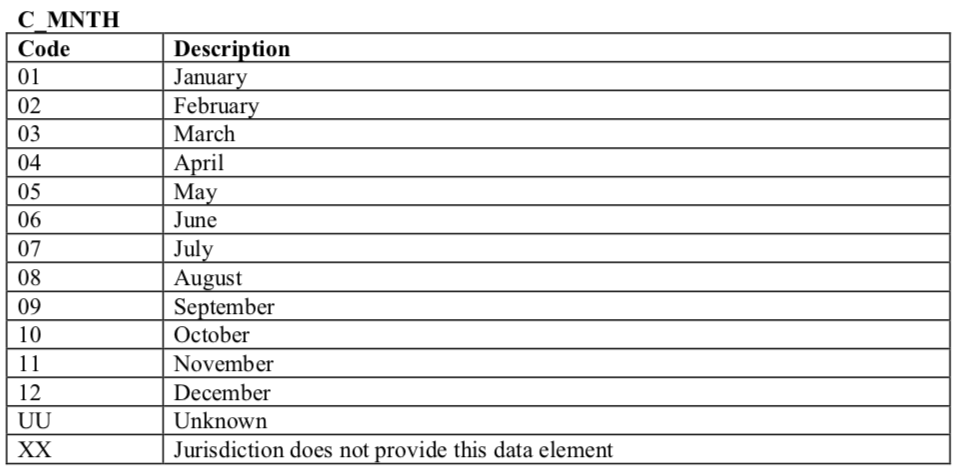

In [95]:
# C_MNTH: Mes de la colisión
display.Image("C_MNTH.png")

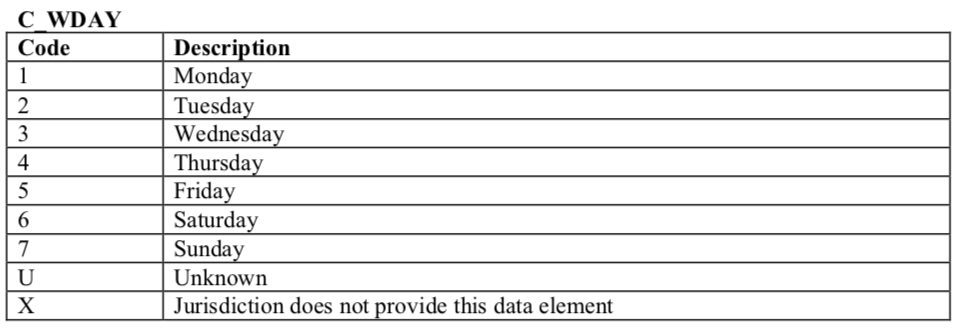

In [94]:
# C_WDAY: Día de la semana de la colisión
display.Image("C_WDAY.png")

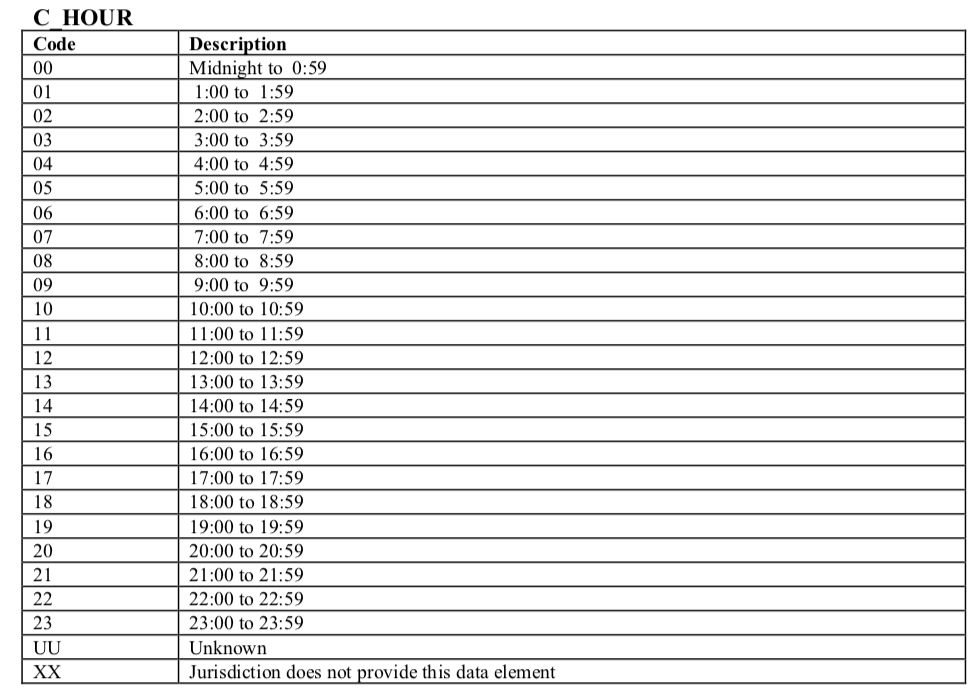

In [93]:
# C_HOUR: Hora de la colisión
display.Image("C_HOUR.png")

## Variables de la colisión

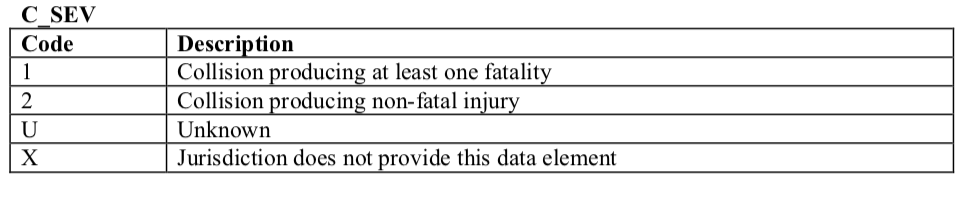

In [97]:
# C_SEV: Si se produjeron fallecidos o no
display.Image("C_SEV.png")

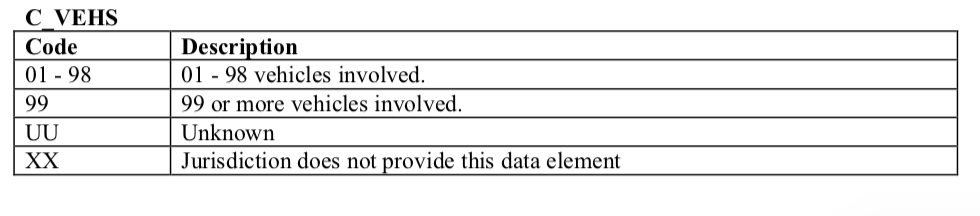

In [98]:
# C_VEHS: Número de vehículos involucrados
display.Image("C_VEHS.png")

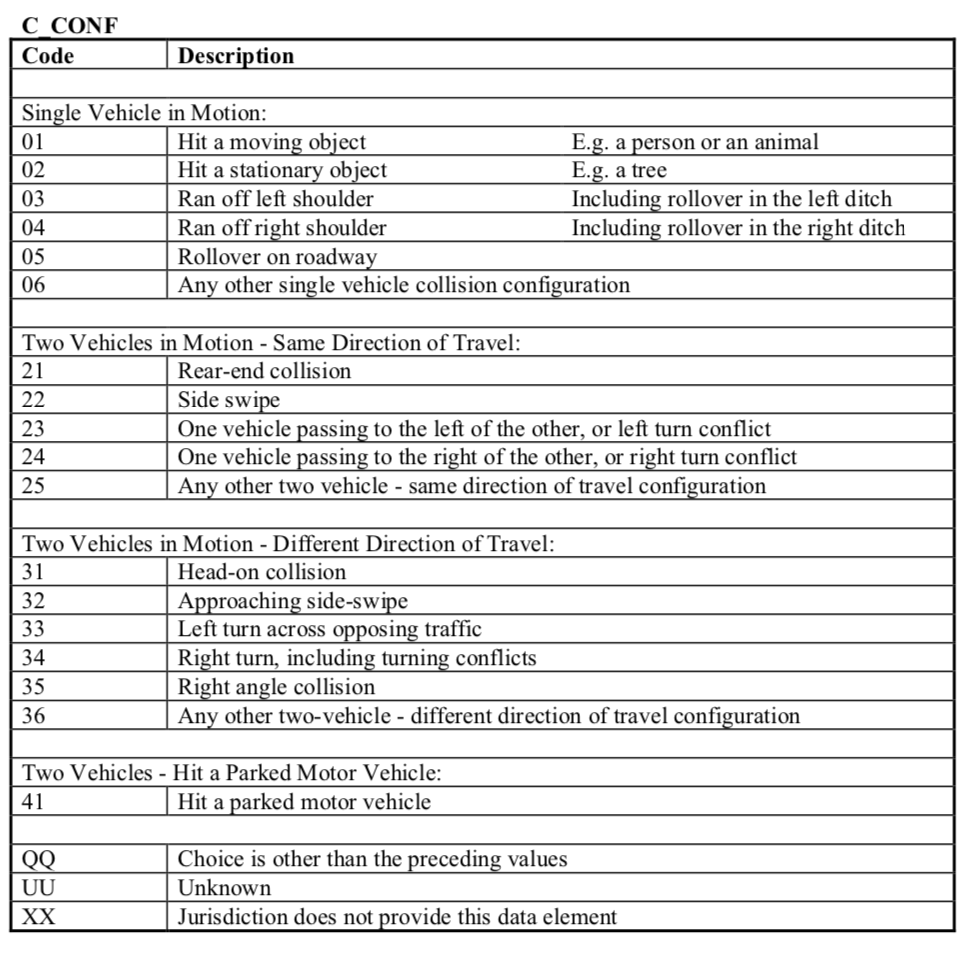

In [99]:
# C_CONF: Configuración del accidente
display.Image("C_CONF.png")

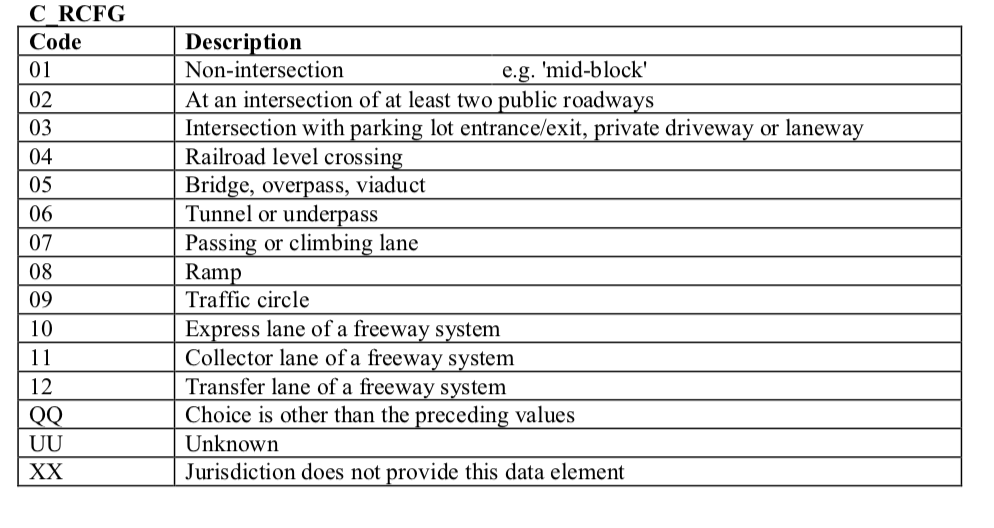

In [100]:
# C_RCFG: Configuración de la carretero
display.Image("C_RCFG.png")

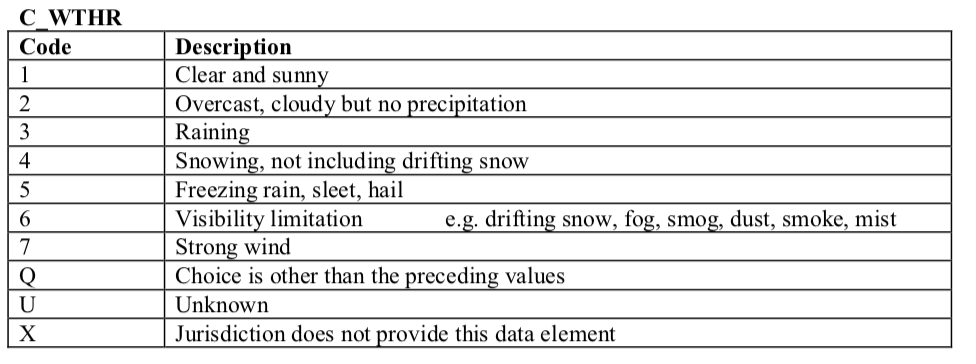

In [101]:
# C_WTHR: Tiempo atmosférico del accidente
display.Image("C_WTHR.png")

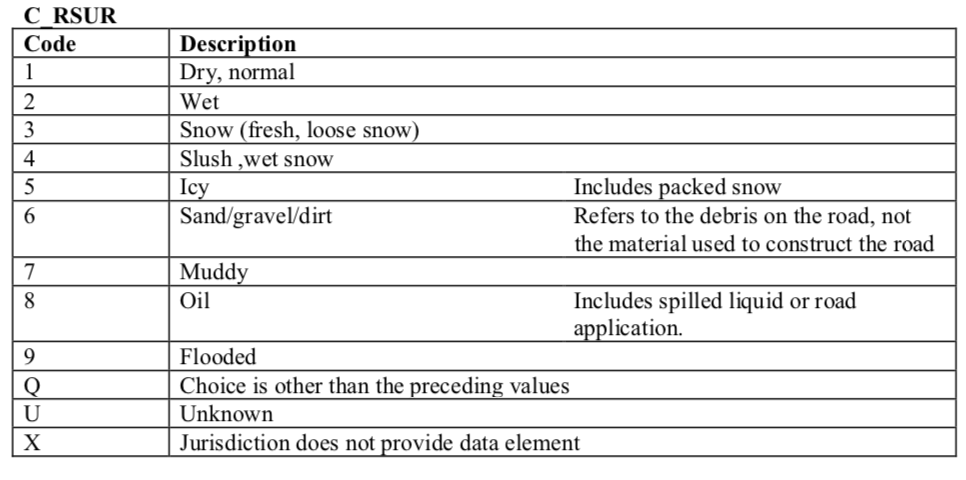

In [102]:
# C_RSUR: Estado de la carretera
display.Image("C_RSUR.png")

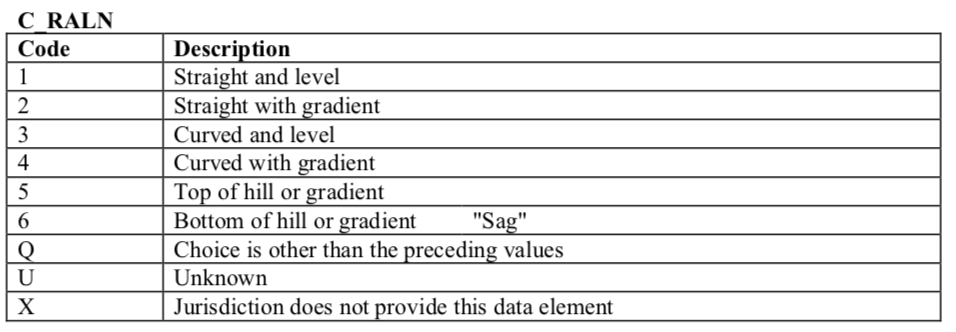

In [103]:
# C_RALN: Tipo de carretera
display.Image("C_RALN.png")

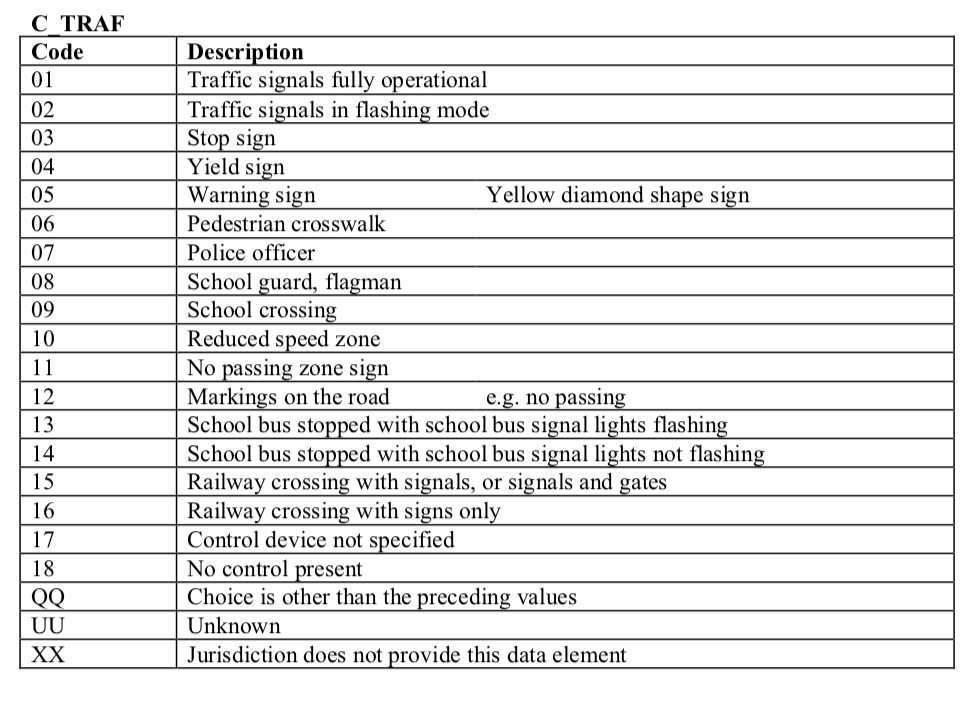

In [104]:
# C_TRAF: Señales de tráfico
display.Image("C_TRAF.png")

## Variables del automóvil

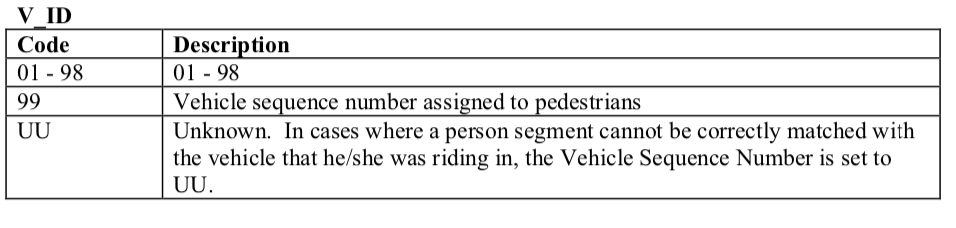

In [106]:
# V_ID: Identificador del vehículo
display.Image("V_ID.png")

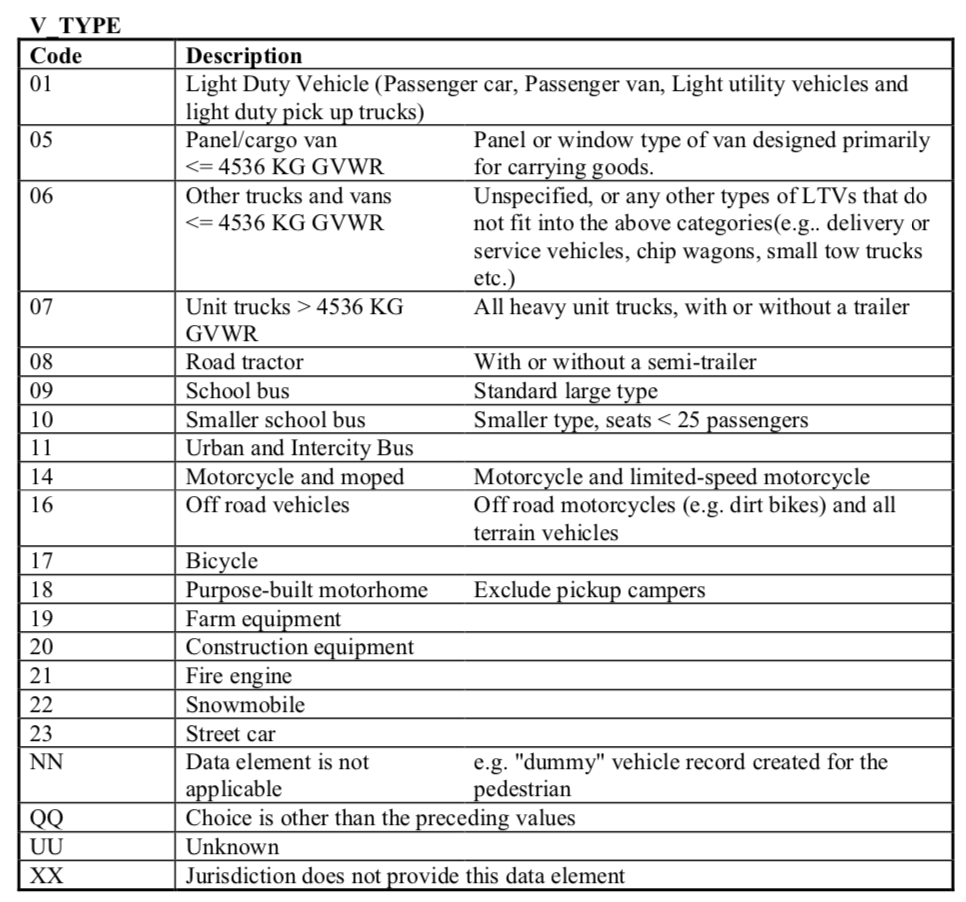

In [107]:
# V_TYPE: Tipo de vehículo
display.Image("V_TYPE.png")

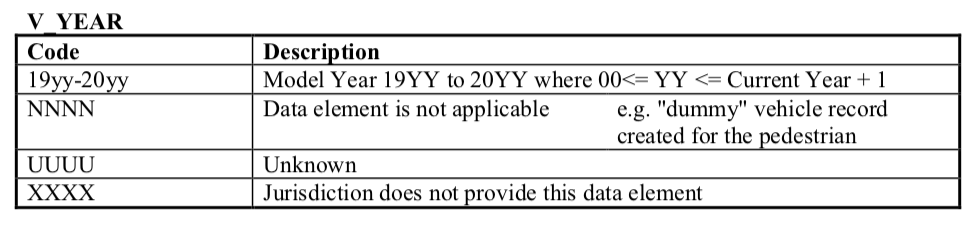

In [108]:
# V_YEAR: Año de matriculación del vehículo
display.Image("V_YEAR.png")

## Variables personales

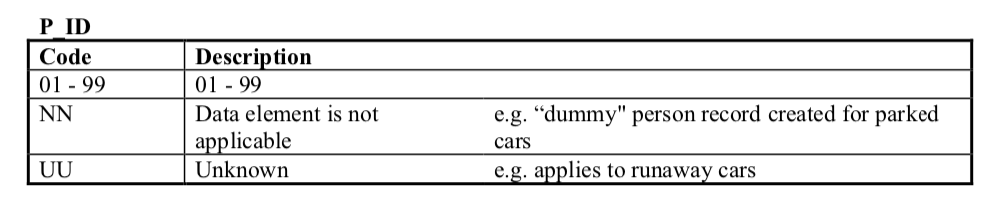

In [109]:
# P_ID: Identificador de personas
display.Image("P_ID.png")

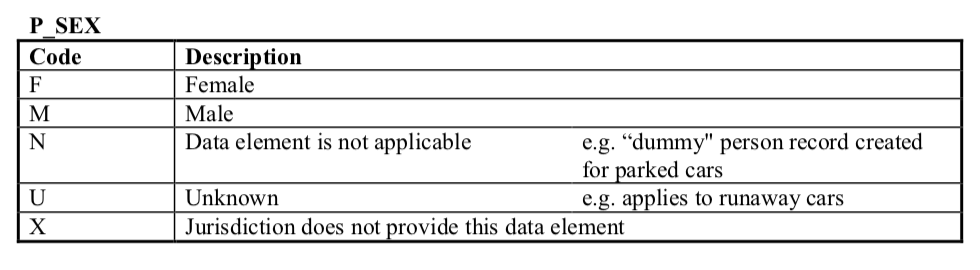

In [110]:
# P_SEX: Sexo de los accidentados
display.Image("P_SEX.png")

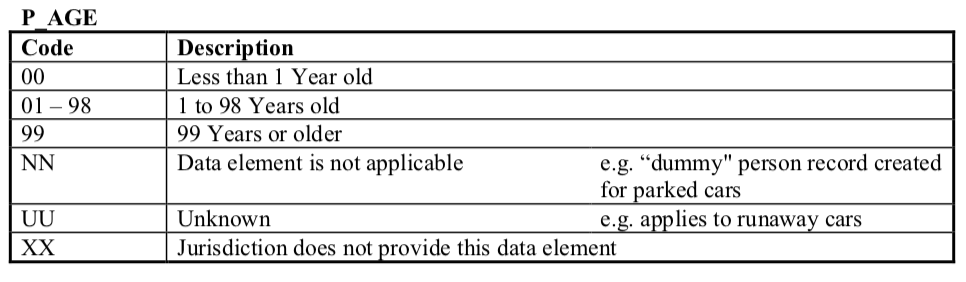

In [111]:
# P_AGE: Edad de los accidentados
display.Image("P_AGE.png")

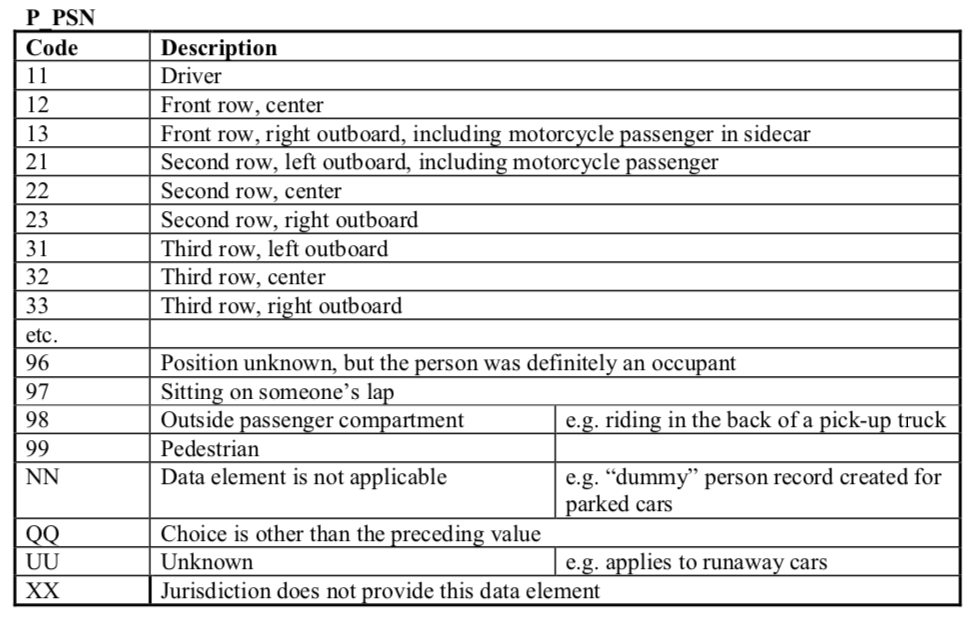

In [112]:
# P_PSN: Posición que ocupaba el accidentado
display.Image("P_PSN.png")

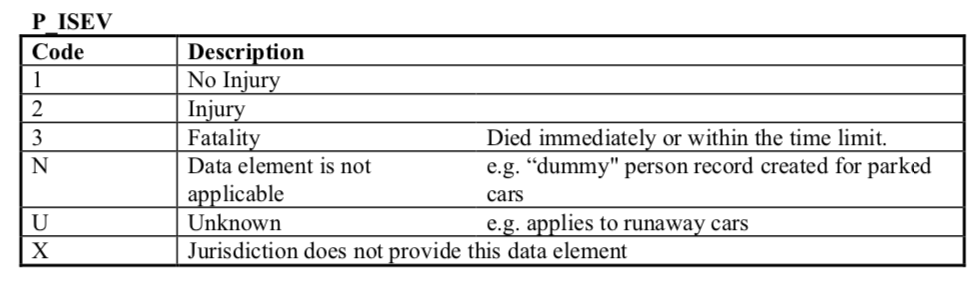

In [113]:
# P_ISEV: Grado de severidad del accidente
display.Image("P_ISEV.png")

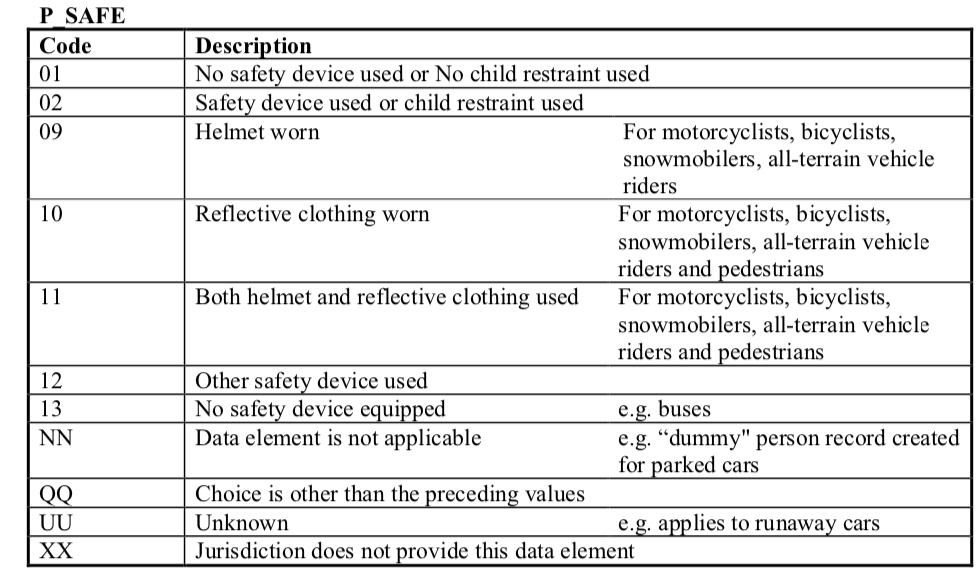

In [114]:
# P_SAFE: Elemento de seguridad utilizado
display.Image("P_SAFE.png")

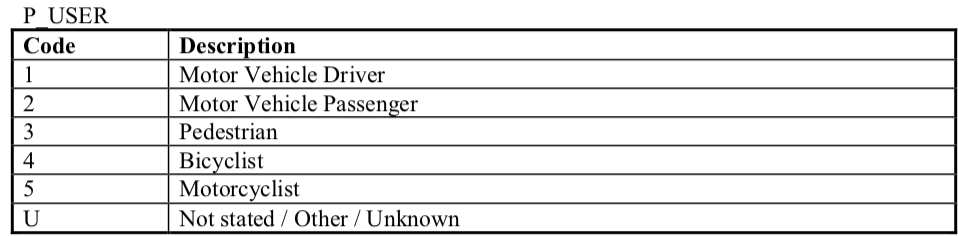

In [116]:
# P_USER: Vehículo que conduce o si es peatón
display.Image("P_USER.png")

# Análisis Exploratorio de los Datos

Procedemos a la lectura de los datos. En este caso, usaremos una base de datos de accidentes de coches ocurridos en Canadá entre 1999 y 2014

In [2]:
# Lectura de los datos
collision_df = pd.read_csv('NCDB_1999_to_2014.csv')
collision_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   C_YEAR  int64 
 1   C_MNTH  object
 2   C_WDAY  object
 3   C_HOUR  object
 4   C_SEV   int64 
 5   C_VEHS  object
 6   C_CONF  object
 7   C_RCFG  object
 8   C_WTHR  object
 9   C_RSUR  object
 10  C_RALN  object
 11  C_TRAF  object
 12  V_ID    object
 13  V_TYPE  object
 14  V_YEAR  object
 15  P_ID    object
 16  P_SEX   object
 17  P_AGE   object
 18  P_PSN   object
 19  P_ISEV  object
 20  P_SAFE  object
 21  P_USER  object
dtypes: int64(2), object(20)
memory usage: 983.6+ MB


In [3]:
collision_df.tail()

C_YEAR C_MNTH C_WDAY C_HOUR  C_SEV C_VEHS C_CONF C_RCFG C_WTHR  \
5860400    2014     UU      U     UU      2     UU     UU     01      U   
5860401    2014     UU      U     23      2     01     06     05      1   
5860402    2014     UU      U     14      2     01     02     01      1   
5860403    2014     UU      U     22      1     01     06     01      2   
5860404    2014     UU      U     22      1     01     06     01      2   

        C_RSUR  ... V_ID V_TYPE V_YEAR P_ID P_SEX P_AGE P_PSN P_ISEV P_SAFE  \
5860400      U  ...   13     07   UUUU   01     M    24    11      1     NN   
5860401      1  ...    1     14   2006   01     M    29    96      2     09   
5860402      5  ...    1     01   2006   01     F    UU    11      2     01   
5860403      4  ...    1     22   UUUU   01     M    67    12      3     01   
5860404      4  ...    1     22   UUUU   02     M    10    98      1     01   

        P_USER  
5860400      1  
5860401      5  
5860402      1  
5860403      U  
5860404      U  

[5 rows x 22 columns]

Nuestro dataset está compuesto por 22 columnas de tipo Object excepto el año del accidente (C_YEAR) y la severidad del accidente (C_SEV). Por otro lado, tenemos 5.860.405 entradas, que corresponden a cada elemento involucrado en un accidente, pudiendo ser personas conductores [de todo tipo de vehículos], pasajeros, peatones, ciclistas o motoristas) o vehículos, si no había personas en su interior.

In [4]:
collision_df.dtypes.sort_values().to_frame('tipo_variable').groupby(by='tipo_variable').size().to_frame('conteo').reset_index()

tipo_variable  conteo
0         int64       2
1        object      20

La gran mayoría de nuestro dataset (20 variables) son de tipo object donde cada número representa una categoría distinta, diferente en cada variable, por lo que más adelante tendremos que hacer un encoding de estas variables.

## Análisis general de la tabla

Vemos las dimensiones de la tabla y si existen filas duplicadas.

In [5]:
print(collision_df.shape, collision_df.drop_duplicates().shape)

(5860405, 22) (5855336, 22)


Como se observa, en nuestro dataframe tenemos varias filas duplicadas, que procedemos a eliminar, quedándose el dataset con 5.855.336 filas y las 22 columnas.

In [6]:
collision_df = collision_df.drop_duplicates()
collision_df.shape

(5855336, 22)

## Análisis de la variable objetivo

Como hemos mencionado anteriormente, nuestro objetivo principal es predecir si va a fallecer alguna persona en un accidente de tráfico. Por ello, elegimos como variable objetivo C_SEV, que nos informa sobre si en el accidente hay uno o más fallecidos (Valor 1) o si no hay (Valor 2).

In [7]:
explore_target_CSEV = collision_df['C_SEV'].value_counts(normalize = True).mul(100).rename('percent').reset_index()
explore_target_CSEV_conteo = collision_df['C_SEV'].value_counts().reset_index()
explore_target_CSEV_pc = pd.merge(explore_target_CSEV, explore_target_CSEV_conteo, on=['index'], how='inner')
explore_target_CSEV_pc

index    percent    C_SEV
0      2  98.315793  5756720
1      1   1.684207    98616

In [8]:
#Plot de la variable objetivo
plot_obj = px.histogram(explore_target_CSEV_pc, x="index", y=['percent'])
plot_obj.show()

Como se observa, el 98.32% (5.756.720) de los elementos involucrados (vehículos o personas), han participado en accidentes donde no se ha producido ningún fallecimiento, frente al 1.68% en los que si hubo.

## Valores nulos

A continuación vamos a observar si existen valores nulos en nuestro dataset.

In [9]:
collision_df.isna().sum()

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    3
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_RALN    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_SEX     0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
dtype: int64

Existen 3 valores nulos en la columna C_VEHS, que informa sobre el número de vehículos involucrados en el accidente. No obstante, hemos podido observar que existen categorías con valores desconocido, como U (Unknown), y valores que la jurisdicción no aporta (X) por lo que procedemos a convertirlos en NA.

In [10]:
# Convertimos valores faltantes en NA`s
null_values = ["U","UU","UUUU","X","XX"]
for columna in collision_df:
         collision_df[columna]=collision_df[columna].replace(null_values, np.nan)

In [11]:
collision_df

C_YEAR C_MNTH C_WDAY C_HOUR  C_SEV C_VEHS C_CONF C_RCFG C_WTHR  \
0          1999      1      1     20      2     02     34    NaN      1   
1          1999      1      1     20      2     02     34    NaN      1   
2          1999      1      1     20      2     02     34    NaN      1   
3          1999      1      1     08      2     01     01    NaN      5   
4          1999      1      1     08      2     01     01    NaN      5   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
5860400    2014    NaN    NaN    NaN      2    NaN    NaN     01    NaN   
5860401    2014    NaN    NaN     23      2     01     06     05      1   
5860402    2014    NaN    NaN     14      2     01     02     01      1   
5860403    2014    NaN    NaN     22      1     01     06     01      2   
5860404    2014    NaN    NaN     22      1     01     06     01      2   

        C_RSUR  ... V_ID V_TYPE V_YEAR P_ID P_SEX P_AGE P_PSN P_ISEV P_SAFE  \
0            5  ...   01     06   1990   01     M    41    11      1    NaN   
1            5  ...   02     01   1987   01     M    19    11      1    NaN   
2            5  ...   02     01   1987   02     F    20    13      2     02   
3            3  ...   01     01   1986   01     M    46    11      1    NaN   
4            3  ...   99     NN   NNNN   01     M    05    99      2    NaN   
...        ...  ...  ...    ...    ...  ...   ...   ...   ...    ...    ...   
5860400    NaN  ...   13     07    NaN   01     M    24    11      1     NN   
5860401      1  ...    1     14   2006   01     M    29    96      2     09   
5860402      5  ...    1     01   2006   01     F   NaN    11      2     01   
5860403      4  ...    1     22    NaN   01     M    67    12      3     01   
5860404      4  ...    1     22    NaN   02     M    10    98      1     01   

        P_USER  
0            1  
1            1  
2            2  
3            1  
4            3  
...        ...  
5860400      1  
5860401      5  
5860402      1  
5860403    NaN  
5860404    NaN  

[5855336 rows x 22 columns]

Volvemos a contar los valores nulos de nuestro dataset.

In [12]:
collision_df.isna().sum()

C_YEAR         0
C_MNTH       385
C_WDAY      1323
C_HOUR     59404
C_SEV          0
C_VEHS       544
C_CONF    178785
C_RCFG    504547
C_WTHR     87953
C_RSUR     78433
C_RALN    434626
C_TRAF    223451
V_ID         433
V_TYPE     29720
V_YEAR    323296
P_ID          16
P_SEX     234351
P_AGE     376225
P_PSN      57633
P_ISEV     80665
P_SAFE    614507
P_USER    175455
dtype: int64

# Exploración gráfica de la tabla

### Variable C_MNTH

In [13]:
collision_df['C_MNTH'].value_counts()

8     546594
7     537261
6     519491
10    515463
9     512370
11    496606
5     467674
3     417414
2     413701
4     392134
12    275290
01    256952
12    250128
1     242500
02      9247
11      2126
Name: C_MNTH, dtype: int64

Esta variable indica el mes en el que se produjo el accidente. Como observamos, existen categorías (meses) duplicadas, por lo que debemos tratarla para poder trabajar con ella.

In [14]:
collision_df['C_MNTH']=collision_df['C_MNTH'].astype('float')

In [15]:
collision_df['C_MNTH'].value_counts()

8.0     546594
7.0     537261
12.0    525418
6.0     519491
10.0    515463
9.0     512370
1.0     499452
11.0    498732
5.0     467674
2.0     422948
3.0     417414
4.0     392134
Name: C_MNTH, dtype: int64

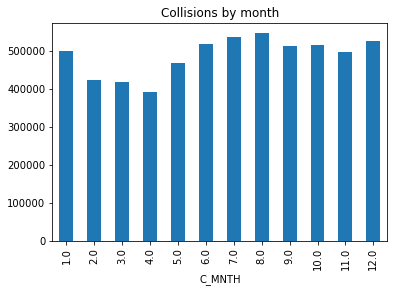

In [16]:
by_month = collision_df.groupby('C_MNTH')['C_SEV'].count()
plot_monthly = by_month.plot(kind = 'bar', title = 'Collisions by month');

Gráficamente se observa como los meses de verano, es donde se existe un mayor número de individuos involucrados en accidentes, en contraste con los invernales. Canadá al ser uno de los países con mayor altitud del hemisferio norte, tiene unos inviernos muy fríos (con temperaturas de entre -25 y -30 grados) y veranos muy calurosos (temperaturas rondando los 30 grados). Todo ello hace que los canadienses salgan más de sus casas entre los meses de verano y otoño, coinicidiendo además con los periodos vacacionales.

Adicionalmente, podemos destacar que uno de los meses con mas accidentes es diciembre, pudiendo ser explicado por las compras y festejos navideños.

### Variable C_WDAY

Al igual que pasa con los meses del año, debemos tratar los días de la semana, pues existen valores duplicados.

In [17]:
collision_df['C_WDAY']=collision_df['C_WDAY'].astype('float')

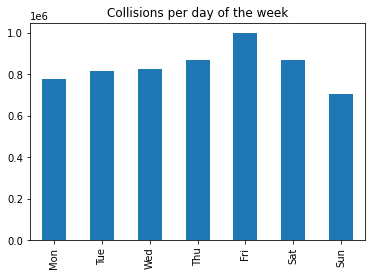

In [18]:
# Plot de la variable C_WDAY
by_weekday = collision_df.groupby('C_WDAY')['C_SEV'].count()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plot_weekly = by_weekday.plot(kind = 'bar',title = 'Collisions per day of the week');

Como se observa, el día de la semana en el que ocurren más accidentes es el viernes, coincidiendo con el comienzo del fin de semana.

### Variable C_HOUR

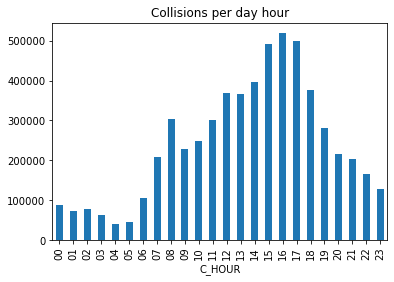

In [19]:
# Plot de la variable C_HOUR
by_hours = collision_df.groupby('C_HOUR')['C_SEV'].count()
plot_hours = by_hours.plot(kind = 'bar', title = 'Collisions per day hour')

Cuando más accidentes se registran es a las 16 horas, seguido por las 17 y 15 horas. Esto puede ser explicado por la salida del trabajo de muchos canadienses junto con la salida de los pequeños de sus colegios.

### Variable C_RCFG

Esta variable indicará dónde se ha producido el accidente. Para un mayor entendimiento, vemos las diferentes categorías.

In [20]:
collision_df['C_RCFG'].unique()

array([nan, 'QQ', '01', '02', '03', '05', '04', '06', '08', '07', '09',
       '10'], dtype=object)

A continuación, graficamos el porcentaje de los fallecidos en los accidente por el tipo de carretera donde circulaban.

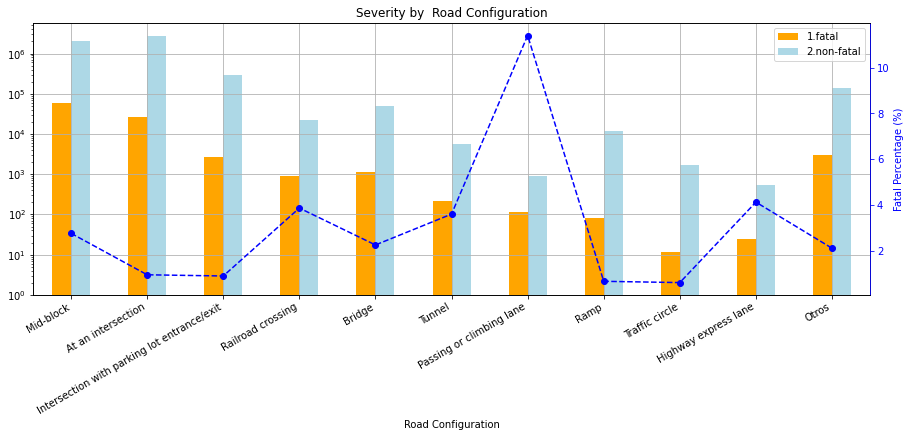

In [21]:
rcfg_type = ['Mid-block','At an intersection','Intersection with parking lot entrance/exit',
            'Railroad crossing','Bridge','Tunnel','Passing or climbing lane',
             'Ramp','Traffic circle','Highway express lane', 'Otros'
             ]

sev_car = collision_df.groupby(['C_RCFG','C_SEV']).size().unstack().fillna(0)
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_ylabel('Fatal Percentage (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')


sev_car.plot(kind='bar',rot=30,log=True,color=['orange','lightblue'],figsize=(15,5),
         title='Severity by  Road Configuration', ax=ax1)
ax1.grid(axis='both')
ax1.legend(['1.fatal','2.non-fatal'])
ax1.set_xticklabels(rcfg_type,ha='right')
ax1.set_xlabel('Road Configuration')

se1 = sev_car[1]/(sev_car[1]+sev_car[2])*100
se1.plot(c='b', style='o--', ax=ax2)

plt.xticks(np.arange(0,11),rcfg_type);

El gráfico anterior, nos muestra el número de accidentes por la zona donde se circulaba. Además se observa el porcentaje de fallecimientos en función del total de accidentes (linea azul discontinua).

Con ello se puede ver que donde más fallecimientos se producen (de manera relativa) son los carriles de adelantamiento (climbing lane), mientras que de manera absoluta, son los pasos de peatones y en los cruces, pues de éstos existen un número mayor.

### Variable V_TYPE

Vemos el tipo de vehículos con el que más accidentes se producen.

In [22]:
vehicles = collision_df.groupby('V_TYPE')['C_SEV'].count()
vehicles

V_TYPE
01    4823371
05      66069
06     175406
07      88011
08      70520
09      20906
10        897
11      51222
14     122682
16       9717
17     122626
18       3132
19       2001
20       7632
21        825
22       4580
23       3073
NN     227551
QQ      25395
Name: C_SEV, dtype: int64

<AxesSubplot:xlabel='V_TYPE'>

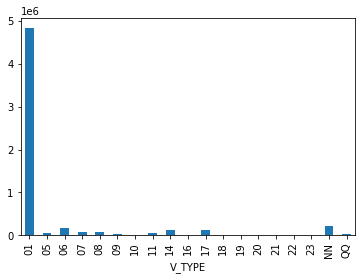

In [23]:
# Plot de V_TYPE
vehicles.plot(kind = 'bar')

Como era de esperar, al ser el vehículo más utilizado, el coche (light duty vehicles [1]) son los que más accidentes causan. Hay que destacar también los accidentes de furgonetas (6), motos (14) y bicicletas (16). Por otro lado, se observa la categoría "NN", que es la etiqueta asignada a los peatones.

Para observarlo mejor, vamos a graficar también por el total de accidentes de coches, de manera relativa.

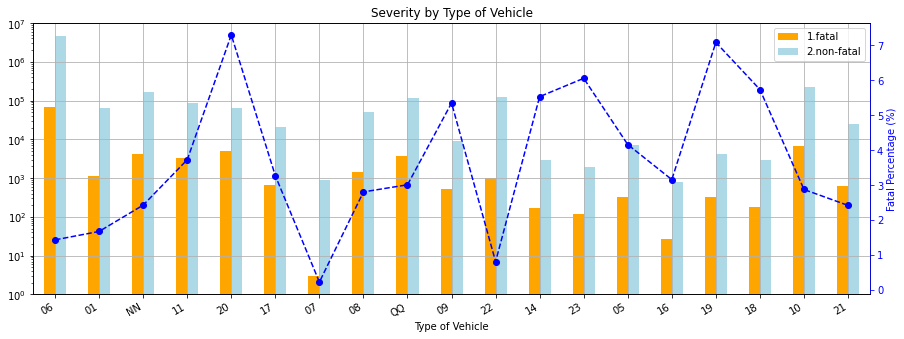

In [24]:
categorias_veh = collision_df['V_TYPE'].dropna().unique()
type_veh = collision_df.groupby(['V_TYPE','C_SEV']).size().unstack().fillna(0)
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_ylabel('Fatal Percentage (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')


type_veh.plot(kind='bar',rot=30,log=True,color=['orange','lightblue'],figsize=(15,5),
         title='Severity by Type of Vehicle', ax=ax1)
ax1.grid(axis='both')
ax1.legend(['1.fatal','2.non-fatal'])
ax1.set_xticklabels(vehicles,ha='right')
ax1.set_xlabel('Type of Vehicle')

se1 = type_veh[1]/(type_veh[1]+type_veh[2])*100
se1.plot(c='b', style='o--', ax=ax2)

plt.xticks(np.arange(0,19),categorias_veh);

En función del total de accidentes, el vehículo que más fallecimientos produce son los vehículos (laborales) de construcciones o granja (20 y 19). Con ello se puede observar cómo el número de fallecimientos, en función del total, se reduce en los vehículos más convencionales.

### Variable P_ISEV

In [25]:
injuries = collision_df.groupby('P_ISEV')['P_ISEV'].count()
injuries

P_ISEV
1    2372821
2    3070875
3      40347
N     290628
Name: P_ISEV, dtype: int64

<AxesSubplot:xlabel='P_ISEV'>

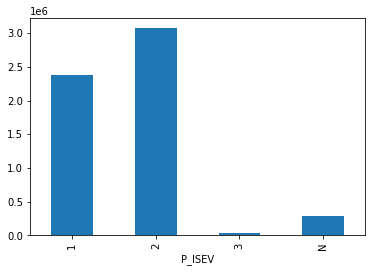

In [26]:
injuries.plot(kind='bar')

La variable P_ISEV, va a mostrar el grado de alcance causado por el accidente. El número de fallecidos (3) es de 40.347 personas, mientras que el número de heridos (cualquier tipo de lesión) asciende hasta 3 millones de personas. Cabe destacar que la categoría "N" corresponde a los coches.

También es importante mencionar que el número de fallecidos que aparece es esta variable difiere con los aparecidos en P_ISEV. Esto es, como ya mencionamos anteriormente, porque C_SEV aparece agrupada por accidente, es decir, que si se ha producido algñun fallecimiento en ese accidente, aparecerá un "1" en todas las filas del mismo.

### Variable P_SAFE

In [27]:
safe_dev = collision_df.groupby('P_SAFE')['C_SEV'].count()
safe_dev

P_SAFE
01     198490
02    4160768
09      96325
10        112
11         11
12      18316
13     148321
NN     571401
QQ      47085
Name: C_SEV, dtype: int64

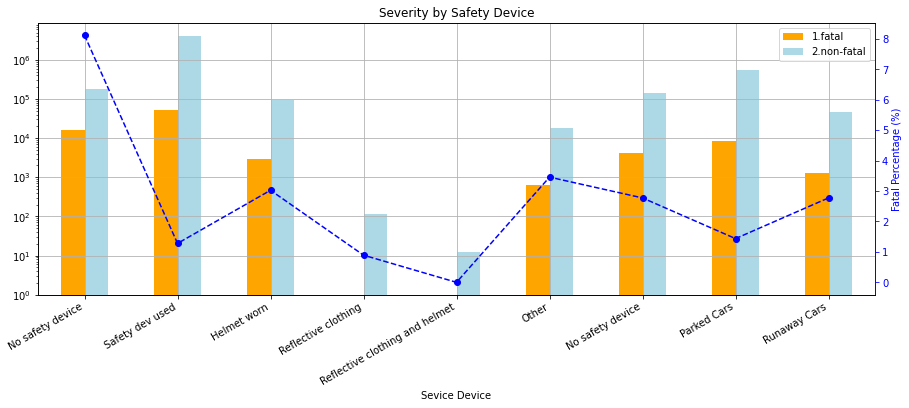

In [28]:
safety_dev = ['No safety device', 'Safety dev used', 'Helmet worn', 'Reflective clothing',
              'Reflective clothing and helmet',
             'Other', 'No safety device', 'Parked Cars', 'Runaway Cars'
             ]

df_safe = collision_df.groupby(['P_SAFE','C_SEV']).size().unstack().fillna(0)
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_ylabel('Fatal Percentage (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')

df_safe.plot(kind='bar',rot=30,log=True,color=['orange','lightblue'],figsize=(15,5),
         title='Severity by Safety Device', ax=ax1)
ax1.grid(axis='both')
ax1.legend(['1.fatal','2.non-fatal'])
ax1.set_xticklabels(safety_dev,ha='right')
ax1.set_xlabel('Sevice Device')

se1 = df_safe[1]/(df_safe[1]+df_safe[2])*100
se1.plot(c='b', style='o--', ax=ax2)

plt.xticks(np.arange(0,9),safety_dev); 

El gráfico anterior va a relacionar la variable P_SAFE, que indica el elemento de seguridad utilizado y si se produjo fallecimientos o no. Con ello se evidencia que los usuarios que no utilizaban ningún tipo de protección tienen mayor probabilidad a fallecer.

### Variable P_USER

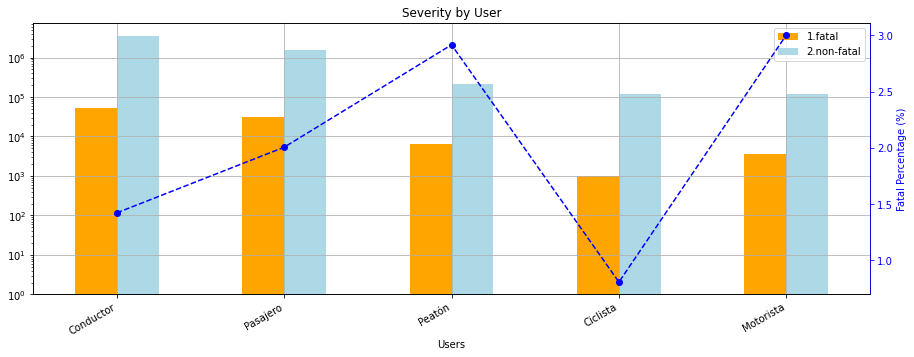

In [29]:
user_type = ['Conductor', 'Pasajero', 'Peatón', 'Ciclista','Motorista']

df_user = collision_df.groupby(['P_USER','C_SEV']).size().unstack().fillna(0)
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_ylabel('Fatal Percentage (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')

df_user.plot(kind='bar',rot=30,log=True,color=['orange','lightblue'],figsize=(15,5),
         title='Severity by User', ax=ax1)
ax1.grid(axis='both')
ax1.legend(['1.fatal','2.non-fatal'])
ax1.set_xticklabels(user_type,ha='right')
ax1.set_xlabel('Users')

se1 = df_user[1]/(df_user[1]+df_user[2])*100
se1.plot(c='b', style='o--', ax=ax2)

plt.xticks(np.arange(0,5),user_type); 

Se ha realizado un gráfico donde se relaciona el papel que juega cada individuo en relación al accidente. Viendo el porecentaje de fatalidad, vemos como los peatones y los motoristas son los más afectados. 

### Variable C_WTHR

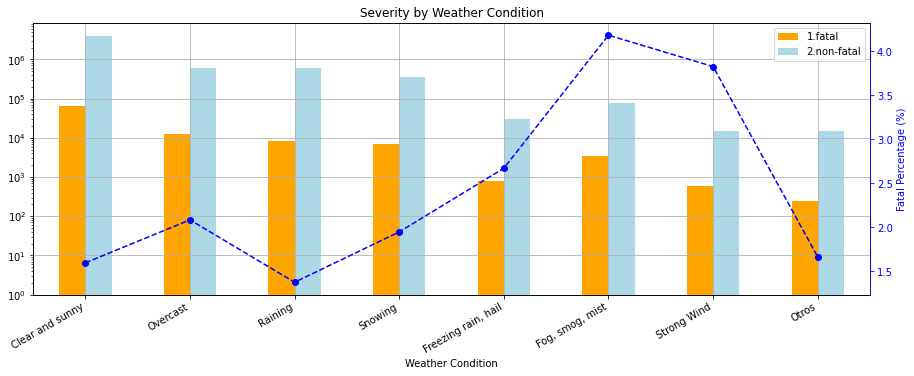

In [30]:
clima =  ['Clear and sunny','Overcast','Raining','Snowing','Freezing rain, hail','Fog, smog, mist',
            'Strong Wind', 'Otros']

df_clima = collision_df.groupby(['C_WTHR','C_SEV']).size().unstack().fillna(0)
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_ylabel('Fatal Percentage (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')

df_clima.plot(kind='bar',rot=30,log=True,color=['orange','lightblue'],figsize=(15,5),
         title='Severity by Weather Condition', ax=ax1)
ax1.grid(axis='both')
ax1.legend(['1.fatal','2.non-fatal'])
ax1.set_xticklabels(clima,ha='right')
ax1.set_xlabel('Weather Condition')

se1 = df_clima[1]/(df_clima[1]+df_clima[2])*100
se1.plot(c='b', style='o--', ax=ax2)

plt.xticks(np.arange(0,8),clima); 

El gráfico nos muestra que el mayor número de accidentes se produce en días soleados, seguidos de los nublados y con precipitaciones de agua o nieve. Sin embargo hay que destacar que de manera relativa, se producen más fallecimientos en relación con el total en días con niebla o fuertes vientos.

### Realación entre variable C_WTHR y C_RSUR

In [31]:
wthrgrouped = collision_df.groupby('C_WTHR').count()
wthrgrouped

C_YEAR   C_MNTH   C_WDAY   C_HOUR    C_SEV   C_VEHS   C_CONF  \
C_WTHR                                                                  
1       4070396  4070250  4069462  4031830  4070396  4070132  3950097   
2        600166   600160   600153   591887   600166   600147   575392   
3        599623   599617   599571   593663   599623   599585   585261   
4        354314   354296   354268   351252   354314   354301   345051   
5         30310    30310    30309    29982    30310    30306    29607   
6         82407    82406    82402    81591    82407    82402    80436   
7         15157    15157    15155    15011    15157    15157    14781   
Q         15010    15008    15007    14865    15010    15010    14576   

         C_RCFG   C_RSUR   C_RALN  ...     V_ID   V_TYPE   V_YEAR     P_ID  \
C_WTHR                             ...                                       
1       3707077  4057968  3755253  ...  4070048  4050750  3847989  4070381   
2        576954   597859   591615  ...   600145   597641   557775   600166   
3        569172   598910   577634  ...   599598   596666   568727   599623   
4        323205   352861   330668  ...   354288   352880   339699   354313   
5         27432    30137    28973  ...    30310    30170    28920    30310   
6         77872    81981    80568  ...    82399    81983    78260    82407   
7         14075    15068    14265  ...    15157    15095    14496    15157   
Q         10724    14634    10547  ...    15009    14933    14446    15010   

          P_SEX    P_AGE    P_PSN   P_ISEV   P_SAFE   P_USER  
C_WTHR                                                        
1       3910251  3804556  4034551  4018394  3645242  3954436  
2        568415   560172   592180   589969   530694   578881  
3        581496   567512   596831   595446   546982   587335  
4        344074   336509   351344   350035   324576   344342  
5         29116    28517    29922    29845    27640    29183  
6         79530    78047    81099    81138    75009    78842  
7         14582    14227    14878    14841    13530    14521  
Q         14725    14268    15001    14882    13644    14639  

[8 rows x 21 columns]

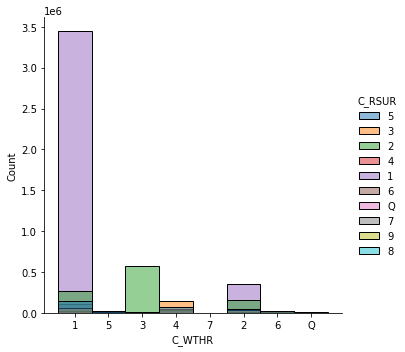

In [32]:
sns.displot(collision_df, x = 'C_WTHR', hue = 'C_RSUR')

Tal y como se puede observar en el gráfico anterior, se ve como cuando el día está soleado la carretera está seca y no peligrosa. Por otro lado, cuando se pruducen precipitaciones (R_WTHR = 3) la superficie de la carretera está mojada (R_SUR = 2).

## Variable P_SEX

In [33]:
SEX_SEV = collision_df.groupby('P_SEX')['C_SEV'].count()
SEX_SEV

P_SEX
F    2438532
M    3167673
N      14780
Name: C_SEV, dtype: int64

<AxesSubplot:xlabel='P_SEX'>

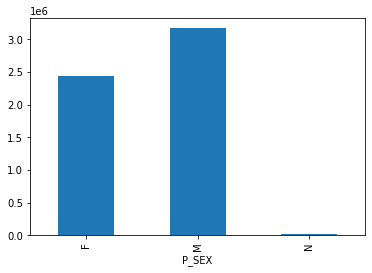

In [34]:
SEX_SEV.plot(kind='bar')

## Variable P_AGE

<AxesSubplot:xlabel='P_AGE'>

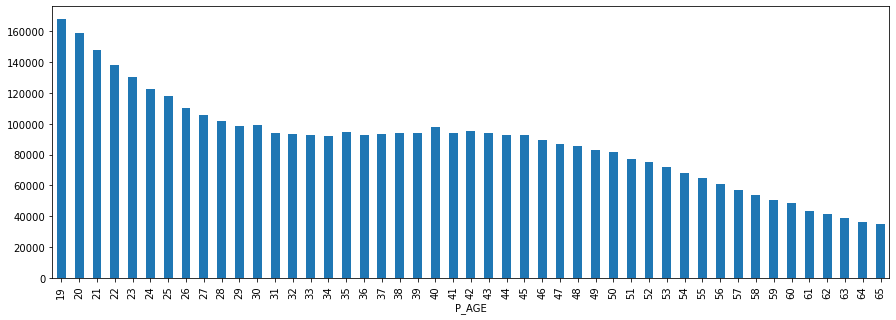

In [35]:
AGE_SEV = collision_df.groupby('P_AGE')['C_SEV'].count()
AGE_SEV[18:65].plot(kind='bar',figsize=(15,5))

Como se observa, el número de accidentes principalmente se concentra en los conductores más jóvenes, pudiendo ser explicado porque son conductores nóveles sin experiencia.

# Tratamiento de los datos

## Preprocesamiento de variables

Antes de comenzar el procesamiento de las variables, convertimos los valores de nuestra variable objetivo en 0 (si no hay fallecidos) y 1 (si los hay).

In [36]:
collision_df['C_SEV'] = collision_df.C_SEV.replace(to_replace=[2], value=[0])

In [37]:
collision_df['C_SEV'].value_counts()

0    5756720
1      98616
Name: C_SEV, dtype: int64

Como el objetivo principal del modelo es saber si en una accidente se van a producir o no fallecimientos, en las variables donde se identifica a la persona, los datos que pertenecen solo a coches no nos sirven. 

### Variable P_SEX

In [38]:
collision_df['P_SEX'].unique()

array(['M', 'F', nan, 'N'], dtype=object)

In [39]:
collision_df['P_SEX'] = collision_df['P_SEX']\
                                .map({'M':'M', 'F':'F', np.nan:'Coche', 'N':'Coche'}).astype(object)

In [40]:
collision_df = collision_df.drop(collision_df.loc[collision_df["P_SEX"] == "Coche"].index, inplace = False)

In [41]:
collision_df['P_SEX'].unique()

array(['M', 'F'], dtype=object)

In [42]:
collision_df['P_SEX'].value_counts()

M    3167673
F    2438532
Name: P_SEX, dtype: int64

### Variable P_ID

Esta variable va a dar diferentes números a las personas que se encontraban dentro del mismo vehículo. Continuando con el objetivo anterior, vamos a eliminar aquellas filas con los vehículos vacíos.

In [43]:
collision_df["P_ID"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '46', '47', '48', '49', '50', '52', '55', '56', '57', '61', '62',
       '63', '65', '66', '67', '68', '69', '70', '71', '72', '76', '77',
       '78', '79', '80', '81', '82', '85', '86', '88', '90', '91', '93',
       '94', '95', '45', '51', 'NN', '53', '54', '58', '59', '60', nan,
       '99', '64', '73', '74', '75', '83', '84', '87', '89', '92'],
      dtype=object)

In [44]:
collision_df = collision_df.dropna(axis=0, subset=['P_ID'])
collision_df = collision_df.drop(collision_df.loc[collision_df["P_ID"] == "NN"].index, inplace = False)

In [45]:
collision_df["P_ID"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '46', '47', '48', '49', '50', '52', '55', '56', '57', '61', '62',
       '63', '65', '66', '67', '68', '69', '70', '71', '72', '76', '77',
       '78', '79', '80', '81', '82', '85', '86', '88', '90', '91', '93',
       '94', '95', '45', '51', '53', '54', '58', '59', '60', '99', '64',
       '73', '74', '75', '83', '84', '87', '89', '92'], dtype=object)

### Variable P_PSN

Esta variable nos indica la posición en la que se encontraban las diferentes personas. Como hacemos con la variable P_ID, eliminamos los coches vacíos.

In [46]:
collision_df = collision_df.drop(collision_df.loc[collision_df["P_PSN"] == "NN"].index, inplace = False)
collision_df = collision_df.dropna(axis=0, subset=['P_PSN'])

In [47]:
collision_df['P_PSN'].unique()

array(['11', '13', '99', '23', '98', '21', '22', '12', 'QQ', '96', '32',
       '31', '33', '97'], dtype=object)

In [48]:
collision_df['P_PSN'].value_counts()

11    3765422
13     874915
23     255272
21     213205
99     207171
22      88947
12      85982
96      42023
32      28252
QQ      17388
98       6466
33       5722
31       4535
97        189
Name: P_PSN, dtype: int64

### Variable P_ISEV

La siguiente variable nos indica el grado de daño causado por el accidente, por lo que cuando se trata de un vehículo, no existen daños personales.

In [49]:
collision_df = collision_df.drop(collision_df.loc[collision_df["P_ISEV"] == "N"].index, inplace = False)
collision_df = collision_df.dropna(axis=0, subset=['P_ISEV'])

In [50]:
collision_df['P_ISEV'].unique()

array(['1', '2', '3'], dtype=object)

In [51]:
collision_df['P_ISEV'].value_counts()

2    3029181
1    2300773
3      40112
Name: P_ISEV, dtype: int64

### Variable P_SAFE

P_SAFE nos indica el elemento de seguridad utilizado en el accidente. Los automóviles no nos proporcionan la información necesaria.

In [52]:
collision_df = collision_df.drop(collision_df.loc[collision_df["P_SAFE"] == "NN"].index, inplace = False)
collision_df = collision_df.dropna(axis=0, subset=['P_SAFE'])

In [53]:
collision_df['P_SAFE'].unique()

array(['02', '01', '13', '12', '09', 'QQ', '10', '11'], dtype=object)

### Variable P_USER

P_USER nos indica el tipo de usuario, si el accidentado fue un conductor de coche, motorista, peatón u otro. Por lo que en esta variable no hay nada que eliminar.

In [54]:
collision_df['P_USER'].value_counts(normalize = False).reset_index()

index   P_USER
0     1  2897330
1     2  1458249
2     3    89675
3     5    73514
4     4    51163

Como se observa acontinuación, se han eliminado un elevado número de filas de nuestro dataset y como la proporción de nuestra variable objetivo no varía significativamente podemos decir que esas filas no nos aportaban gran información para el estudio.

In [55]:
collision_df['C_SEV'].value_counts()

0    4540498
1      77638
Name: C_SEV, dtype: int64

In [56]:
explore_target_CSEV3 = collision_df['C_SEV'].value_counts(normalize = True).mul(100).rename('percent').reset_index()
explore_target_CSEV_conteo3 = collision_df['C_SEV'].value_counts().reset_index()
explore_target_CSEV_pc3 = pd.merge(explore_target_CSEV3, explore_target_CSEV_conteo3, on=['index'], how='inner')
explore_target_CSEV_pc3

index    percent    C_SEV
0      0  98.318846  4540498
1      1   1.681154    77638

Convertimos las categorías asociadas a los peatones ("NN" y "NNNN"), con el valor 0 para posteriormente poder llevar a cabo los encoding.

In [57]:
# Codificación de peatones
columna = ["V_TYPE", "V_YEAR"]
peatones = ["NN","NNNN"]
for columna in collision_df:
         collision_df[columna]=collision_df[columna].replace(peatones, "0")

In [58]:
collision_df['V_TYPE'].unique()

array(['01', '06', nan, '20', '17', '07', '08', 'QQ', '11', '09', '22',
       '0', '14', '23', '05', '16', '19', '18', '10', '21'], dtype=object)

###  Variable C_V_YEAR

Una vez estudiado el dataset, observamos que la variable V_YEAR (año de matriculación del vehículo), no nos aporta ninguna información al igual que C_YEAR (año del accidente). Sin embargo, la información que si es relevante es el año de antiguedad del vehículo en el momento del accidente, pues los vehículos más antiguos causan más accidentes.

Por ello, hemos creado la variable C_V_YEARS, que consiste en la diferencia entre esos años. Para evitar los posibles valores nulos, los eliminamos antes de la creación de la variable.

In [59]:
collision_df['V_YEAR'].isnull().sum()

150247

In [60]:
# Eliminamos los NA
collision_df = collision_df.dropna(axis=0, subset=['V_YEAR'])

In [61]:
collision_df['V_YEAR'].isnull().sum()

0

In [62]:
collision_df['V_YEAR'].unique()

array(['1987', '1997', '1985', '1988', '1993', '1992', '1998', '1994',
       '1996', '1995', '1986', '1983', '1990', '1989', '1991', '1999',
       '1984', '1965', '0', '1968', '1981', '1976', '1979', '1972',
       '1977', '1982', '1975', '1978', '1974', '1980', '1967', '1973',
       '1970', '1971', '1962', '1969', '1966', '1945', '2000', '1950',
       '1964', '1959', '1955', '1958', '1903', '1909', '1923', '1960',
       '1963', '1914', '1908', '1953', '1906', '1961', '1925', '1949',
       '1938', '1907', '1952', '1904', '1917', '1944', '1956', '1930',
       '1931', '1939', '1951', '1946', '1947', '1957', '1954', '1943',
       '1901', '1948', '1937', '1905', '1935', '1926', '1941', '1932',
       '1912', '1920', '1933', '1919', '2001', '1913', '1940', '1927',
       '2002', '1916', '1929', '1928', '1942', '1918', '2003', '1924',
       '1922', '1915', '1934', '2004', '2005', '2006', '2007', '2008',
       '1911', '2009', '2010', '2011', '1936', '2012', '1910', '1921',
       '2

In [63]:
# Se pone como tipo "int"
collision_df['V_YEAR']=collision_df['V_YEAR'].astype('int')

In [64]:
collision_df['V_YEAR'].unique()

array([1987, 1997, 1985, 1988, 1993, 1992, 1998, 1994, 1996, 1995, 1986,
       1983, 1990, 1989, 1991, 1999, 1984, 1965,    0, 1968, 1981, 1976,
       1979, 1972, 1977, 1982, 1975, 1978, 1974, 1980, 1967, 1973, 1970,
       1971, 1962, 1969, 1966, 1945, 2000, 1950, 1964, 1959, 1955, 1958,
       1903, 1909, 1923, 1960, 1963, 1914, 1908, 1953, 1906, 1961, 1925,
       1949, 1938, 1907, 1952, 1904, 1917, 1944, 1956, 1930, 1931, 1939,
       1951, 1946, 1947, 1957, 1954, 1943, 1901, 1948, 1937, 1905, 1935,
       1926, 1941, 1932, 1912, 1920, 1933, 1919, 2001, 1913, 1940, 1927,
       2002, 1916, 1929, 1928, 1942, 1918, 2003, 1924, 1922, 1915, 1934,
       2004, 2005, 2006, 2007, 2008, 1911, 2009, 2010, 2011, 1936, 2012,
       1910, 1921, 2013, 2014, 2015])

In [65]:
# Creación de C_V_YEARS
collision_df['C_V_YEARS'] = collision_df['C_YEAR'] - collision_df['V_YEAR']

In [66]:
# Una vez creada C_V_YEARS, eliminamos ambas columnas
collision_df = collision_df.drop(['V_YEAR', 'C_YEAR'], axis=1)

In [67]:
collision_df.isna().sum()

C_MNTH          147
C_WDAY          642
C_HOUR        39833
C_SEV             0
C_VEHS          125
C_CONF       101978
C_RCFG       387773
C_WTHR        56110
C_RSUR        54415
C_RALN       358611
C_TRAF       133561
V_ID              0
V_TYPE         6268
P_ID              0
P_SEX             0
P_AGE         89204
P_PSN             0
P_ISEV            0
P_SAFE            0
P_USER        40832
C_V_YEARS         0
dtype: int64

# Codificación de variables

Como estamos tratando con variables categóricas, va a ser necesario realizar la codificación de variables para poder trabajar con ellas.

## Mean Encoding

El mean encoding consiste en sustituir nuestra variable categórica por una única nueva variable numérica que, va a dar información sobre la variable objetivo. Por lo que se va a crear una relación monótona entre ambas variables. Esto sucede porque por cada categoría única que tenga esa variable se calcula la media correspondiente a sus valores en la variable objetivo.

In [68]:
cols=['C_SEV', 'C_VEHS', 'C_CONF', 'C_RCFG',
       'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE', 'P_ID',
       'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE', 'P_USER', 'C_V_YEARS']
for i in cols:
    te = ce.TargetEncoder(cols)
    collision_df[i] = te.fit_transform(collision_df[i],collision_df.C_SEV)
collision_df 

C_MNTH  C_WDAY C_HOUR  C_SEV    C_VEHS    C_CONF    C_RCFG    C_WTHR  \
2           1.0     1.0     20      0  0.013564  0.012284  0.010248  0.015696   
10          1.0     1.0     15      0  0.028411  0.033433  0.010248  0.015696   
12          1.0     1.0     14      0  0.013564  0.116004  0.010248  0.013032   
13          1.0     1.0     01      0  0.028411  0.017751  0.010248  0.015696   
14          1.0     1.0     01      0  0.028411  0.017751  0.010248  0.015696   
...         ...     ...    ...    ...       ...       ...       ...       ...   
5860378    12.0     7.0     19      0  0.028411  0.038329  0.027451  0.015696   
5860379    12.0     7.0     19      0  0.028411  0.038329  0.027451  0.015696   
5860380    12.0     7.0     19      0  0.028411  0.038329  0.027451  0.015696   
5860401     NaN     NaN     23      0  0.028411  0.025208  0.021416  0.015696   
5860402     NaN     NaN     14      0  0.028411  0.026256  0.027451  0.015696   

           C_RSUR    C_RALN  ...      V_ID    V_TYPE      P_ID     P_SEX  \
2        0.019655  0.037214  ...  0.013193  0.014446  0.016719  0.012028   
10       0.019655  0.006458  ...  0.018960  0.014446  0.016719  0.012028   
12       0.020876  0.020505  ...  0.013193  0.014446  0.015325  0.012028   
13       0.013660  0.031648  ...  0.018960  0.024349  0.015325  0.020417   
14       0.013660  0.031648  ...  0.018960  0.024349  0.016719  0.020417   
...           ...       ...  ...       ...       ...       ...       ...   
5860378  0.019692  0.039221  ...  0.017863  0.014446  0.015325  0.012028   
5860379  0.019692  0.039221  ...  0.017863  0.014446  0.016719  0.020417   
5860380  0.019692  0.039221  ...  0.017863  0.014446  0.020097  0.012028   
5860401  0.016694  0.006458  ...  0.017863  0.035891  0.015325  0.020417   
5860402  0.019655  0.039221  ...  0.017863  0.014446  0.015325  0.012028   

            P_AGE     P_PSN    P_ISEV    P_SAFE    P_USER  C_V_YEARS  
2        0.017808  0.017395  0.011248  0.012646  0.018785         12  
10       0.017956  0.017395  0.011248  0.012646  0.018785          2  
12       0.013964  0.014903  0.011248  0.012646  0.014475          2  
13       0.016909  0.014903  0.011248  0.012646  0.014475         14  
14       0.015368  0.017395  0.011248  0.012646  0.018785         14  
...           ...       ...       ...       ...       ...        ...  
5860378  0.014814  0.014903  0.011248  0.012646  0.014475         13  
5860379  0.015428  0.017395  0.007650  0.012646  0.018785         13  
5860380  0.022315  0.019387  0.011248  0.012646  0.018785         13  
5860401  0.015043  0.056047  0.011248  0.036683  0.035891          8  
5860402  0.008609  0.014903  0.011248  0.086157  0.014475          8  

[4467889 rows x 21 columns]

In [69]:
collision_df.dtypes

C_MNTH       float64
C_WDAY       float64
C_HOUR        object
C_SEV          int64
C_VEHS       float64
C_CONF       float64
C_RCFG       float64
C_WTHR       float64
C_RSUR       float64
C_RALN       float64
C_TRAF       float64
V_ID         float64
V_TYPE       float64
P_ID         float64
P_SEX        float64
P_AGE        float64
P_PSN        float64
P_ISEV       float64
P_SAFE       float64
P_USER       float64
C_V_YEARS      int64
dtype: object

## Cyclical Encoding

Adicionalmente, con el objetivo de tratar los datos temporales (día de la semana, hora y mes) con el mismo peso, tenemos que hacer una codificación cíclica.

In [70]:
def codificacion_ciclica(dataset, columns):
    for columna in columns:
        dataset[columna+"_norm"] = 2*math.pi*dataset[columna]/dataset[columna].max()
        dataset["cos_"+columna] = np.cos(dataset[columna+"_norm"])
        dataset["sin_"+columna] = np.sin(dataset[columna+"_norm"])
        dataset = dataset.drop([columna+"_norm"], axis=1)
    return dataset

In [71]:
columns = ["C_HOUR", 'C_MNTH', 'C_WDAY']

collision_df['C_HOUR']= collision_df['C_HOUR'].astype('float')
collision_df['C_MNTH']= collision_df['C_MNTH'].astype('float')
collision_df['C_WDAY']= collision_df['C_WDAY'].astype('float')

collision_df = codificacion_ciclica(collision_df, columns)
collision_df

C_MNTH  C_WDAY  C_HOUR  C_SEV    C_VEHS    C_CONF    C_RCFG  \
2           1.0     1.0    20.0      0  0.013564  0.012284  0.010248   
10          1.0     1.0    15.0      0  0.028411  0.033433  0.010248   
12          1.0     1.0    14.0      0  0.013564  0.116004  0.010248   
13          1.0     1.0     1.0      0  0.028411  0.017751  0.010248   
14          1.0     1.0     1.0      0  0.028411  0.017751  0.010248   
...         ...     ...     ...    ...       ...       ...       ...   
5860378    12.0     7.0    19.0      0  0.028411  0.038329  0.027451   
5860379    12.0     7.0    19.0      0  0.028411  0.038329  0.027451   
5860380    12.0     7.0    19.0      0  0.028411  0.038329  0.027451   
5860401     NaN     NaN    23.0      0  0.028411  0.025208  0.021416   
5860402     NaN     NaN    14.0      0  0.028411  0.026256  0.027451   

           C_WTHR    C_RSUR    C_RALN  ...    P_ISEV    P_SAFE    P_USER  \
2        0.015696  0.019655  0.037214  ...  0.011248  0.012646  0.018785   
10       0.015696  0.019655  0.006458  ...  0.011248  0.012646  0.018785   
12       0.013032  0.020876  0.020505  ...  0.011248  0.012646  0.014475   
13       0.015696  0.013660  0.031648  ...  0.011248  0.012646  0.014475   
14       0.015696  0.013660  0.031648  ...  0.011248  0.012646  0.018785   
...           ...       ...       ...  ...       ...       ...       ...   
5860378  0.015696  0.019692  0.039221  ...  0.011248  0.012646  0.014475   
5860379  0.015696  0.019692  0.039221  ...  0.007650  0.012646  0.018785   
5860380  0.015696  0.019692  0.039221  ...  0.011248  0.012646  0.018785   
5860401  0.015696  0.016694  0.006458  ...  0.011248  0.036683  0.035891   
5860402  0.015696  0.019655  0.039221  ...  0.011248  0.086157  0.014475   

         C_V_YEARS  cos_C_HOUR    sin_C_HOUR  cos_C_MNTH    sin_C_MNTH  \
2               12    0.682553 -7.308360e-01    0.866025  5.000000e-01   
10               2   -0.576680 -8.169699e-01    0.866025  5.000000e-01   
12               2   -0.775711 -6.310879e-01    0.866025  5.000000e-01   
13              14    0.962917  2.697968e-01    0.866025  5.000000e-01   
14              14    0.962917  2.697968e-01    0.866025  5.000000e-01   
...            ...         ...           ...         ...           ...   
5860378         13    0.460065 -8.878852e-01    1.000000 -2.449294e-16   
5860379         13    0.460065 -8.878852e-01    1.000000 -2.449294e-16   
5860380         13    0.460065 -8.878852e-01    1.000000 -2.449294e-16   
5860401          8    1.000000 -2.449294e-16         NaN           NaN   
5860402          8   -0.775711 -6.310879e-01         NaN           NaN   

         cos_C_WDAY    sin_C_WDAY  
2           0.62349  7.818315e-01  
10          0.62349  7.818315e-01  
12          0.62349  7.818315e-01  
13          0.62349  7.818315e-01  
14          0.62349  7.818315e-01  
...             ...           ...  
5860378     1.00000 -2.449294e-16  
5860379     1.00000 -2.449294e-16  
5860380     1.00000 -2.449294e-16  
5860401         NaN           NaN  
5860402         NaN           NaN  

[4467889 rows x 27 columns]

Como ya hemos hecho el cyclical encoding, las variables temporales "C_HOUR", "C_MNTH", "C_WDAY" no nos van a aportar mas información, por lo que las eliminamos.

In [72]:
# Eliminamos las columnas temporales
for i in columns:
    collision_df = (collision_df.drop(i ,axis=1))

In [73]:
collision_df

C_SEV    C_VEHS    C_CONF    C_RCFG    C_WTHR    C_RSUR    C_RALN  \
2            0  0.013564  0.012284  0.010248  0.015696  0.019655  0.037214   
10           0  0.028411  0.033433  0.010248  0.015696  0.019655  0.006458   
12           0  0.013564  0.116004  0.010248  0.013032  0.020876  0.020505   
13           0  0.028411  0.017751  0.010248  0.015696  0.013660  0.031648   
14           0  0.028411  0.017751  0.010248  0.015696  0.013660  0.031648   
...        ...       ...       ...       ...       ...       ...       ...   
5860378      0  0.028411  0.038329  0.027451  0.015696  0.019692  0.039221   
5860379      0  0.028411  0.038329  0.027451  0.015696  0.019692  0.039221   
5860380      0  0.028411  0.038329  0.027451  0.015696  0.019692  0.039221   
5860401      0  0.028411  0.025208  0.021416  0.015696  0.016694  0.006458   
5860402      0  0.028411  0.026256  0.027451  0.015696  0.019655  0.039221   

           C_TRAF      V_ID    V_TYPE  ...    P_ISEV    P_SAFE    P_USER  \
2        0.014254  0.013193  0.014446  ...  0.011248  0.012646  0.018785   
10       0.013806  0.018960  0.014446  ...  0.011248  0.012646  0.018785   
12       0.013806  0.013193  0.014446  ...  0.011248  0.012646  0.014475   
13       0.013806  0.018960  0.024349  ...  0.011248  0.012646  0.014475   
14       0.013806  0.018960  0.024349  ...  0.011248  0.012646  0.018785   
...           ...       ...       ...  ...       ...       ...       ...   
5860378  0.023893  0.017863  0.014446  ...  0.011248  0.012646  0.014475   
5860379  0.023893  0.017863  0.014446  ...  0.007650  0.012646  0.018785   
5860380  0.023893  0.017863  0.014446  ...  0.011248  0.012646  0.018785   
5860401  0.023893  0.017863  0.035891  ...  0.011248  0.036683  0.035891   
5860402  0.023893  0.017863  0.014446  ...  0.011248  0.086157  0.014475   

         C_V_YEARS  cos_C_HOUR    sin_C_HOUR  cos_C_MNTH    sin_C_MNTH  \
2               12    0.682553 -7.308360e-01    0.866025  5.000000e-01   
10               2   -0.576680 -8.169699e-01    0.866025  5.000000e-01   
12               2   -0.775711 -6.310879e-01    0.866025  5.000000e-01   
13              14    0.962917  2.697968e-01    0.866025  5.000000e-01   
14              14    0.962917  2.697968e-01    0.866025  5.000000e-01   
...            ...         ...           ...         ...           ...   
5860378         13    0.460065 -8.878852e-01    1.000000 -2.449294e-16   
5860379         13    0.460065 -8.878852e-01    1.000000 -2.449294e-16   
5860380         13    0.460065 -8.878852e-01    1.000000 -2.449294e-16   
5860401          8    1.000000 -2.449294e-16         NaN           NaN   
5860402          8   -0.775711 -6.310879e-01         NaN           NaN   

         cos_C_WDAY    sin_C_WDAY  
2           0.62349  7.818315e-01  
10          0.62349  7.818315e-01  
12          0.62349  7.818315e-01  
13          0.62349  7.818315e-01  
14          0.62349  7.818315e-01  
...             ...           ...  
5860378     1.00000 -2.449294e-16  
5860379     1.00000 -2.449294e-16  
5860380     1.00000 -2.449294e-16  
5860401         NaN           NaN  
5860402         NaN           NaN  

[4467889 rows x 24 columns]

Para confirmar que se etá ejecutando correctamente el cyclical encoding, ploteamos las variables de las horas.

In [74]:
# Graficamos la nueva variable temporal (Cyclical encoding)
df_selected = collision_df[["cos_C_HOUR","sin_C_HOUR"]].sample(100).sort_index()
display(df_selected)

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_selected["cos_C_HOUR"], y=df_selected["sin_C_HOUR"], mode="markers"))

fig.update_layout(xaxis = dict(title="cos_x"),
                  yaxis = dict(title="sin_x", scaleanchor = "x", scaleratio = 1))

cos_C_HOUR    sin_C_HOUR
70772      0.460065 -8.878852e-01
102032     1.000000 -2.449294e-16
109673     0.854419  5.195840e-01
114348    -0.990686 -1.361666e-01
124492     0.203456 -9.790841e-01
...             ...           ...
5593290   -0.068242  9.976688e-01
5628647   -0.576680 -8.169699e-01
5634741   -0.334880 -9.422609e-01
5724518   -0.990686 -1.361666e-01
5816451   -0.775711 -6.310879e-01

[100 rows x 2 columns]

Existen variables que agrupan los valores que no se muestran anteriormente como "Q" o "QQ", para poder hacer el mean encoding, las transformamos en un número (100). 

In [76]:
otros = ['Q','QQ']
for columna in collision_df:
         collision_df[columna]=collision_df[columna].replace(otros, "100")

In [77]:
collision_df['C_CONF'].unique()

array([0.01228423, 0.03343344, 0.11600404, 0.0177511 , 0.00330635,
       0.01447162, 0.02599839, 0.03832941, 0.02625568, 0.0098988 ,
       0.00940216, 0.0140275 , 0.01908226, 0.0252084 , 0.01576811,
       0.03884074, 0.0063969 , 0.0249563 , 0.01346487, 0.01010101])

### Imputación de valores missing Variable C_MNTH

La imputación de la variable C_MNTH (tanto de senos como de cosenos), la vamos  a realizar mediante el método fillna, que transformará los NA en el valor anterior. Esto es porque es más probable que el mes faltante sea el mismo que el del dato anterior. Por eso lo hacemos antes de dividir el set en train y test.

In [78]:
collision_df['cos_C_MNTH'] = collision_df['cos_C_MNTH'].fillna(method='ffill')

In [79]:
collision_df['sin_C_MNTH'] = collision_df['sin_C_MNTH'].fillna(method='ffill')

## Matriz de correlaciones

A continuación vamos a estudiar las correlaciones de las variables. Para ello vamos a utilizar el coeficiente de correlación de Spearman porque estamos tratando con variables categóricas. Antes de comenzar con el estudio, vamos a transformar todas las variables a float.

In [80]:
# Convertimos en float
collision_df['C_SEV'] = collision_df['C_SEV'].astype('float64')
collision_df['C_V_YEARS'] = collision_df['C_V_YEARS'].astype('float64')

In [81]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = collision_df.select_dtypes(include=['float64']).corr(method='spearman')
tidy_corr_matrix(corr_matrix).head(10)

variable_1 variable_2         r     abs_r
397     P_USER      P_PSN  0.915223  0.915223
328      P_PSN     P_USER  0.915223  0.915223
253       P_ID      P_PSN  0.869097  0.869097
322      P_PSN       P_ID  0.869097  0.869097
256       P_ID     P_USER  0.824623  0.824623
394     P_USER       P_ID  0.824623  0.824623
171     C_TRAF     C_RCFG  0.498430  0.498430
79      C_RCFG     C_TRAF  0.498430  0.498430
124     C_RSUR     C_WTHR  0.454616  0.454616
101     C_WTHR     C_RSUR  0.454616  0.454616

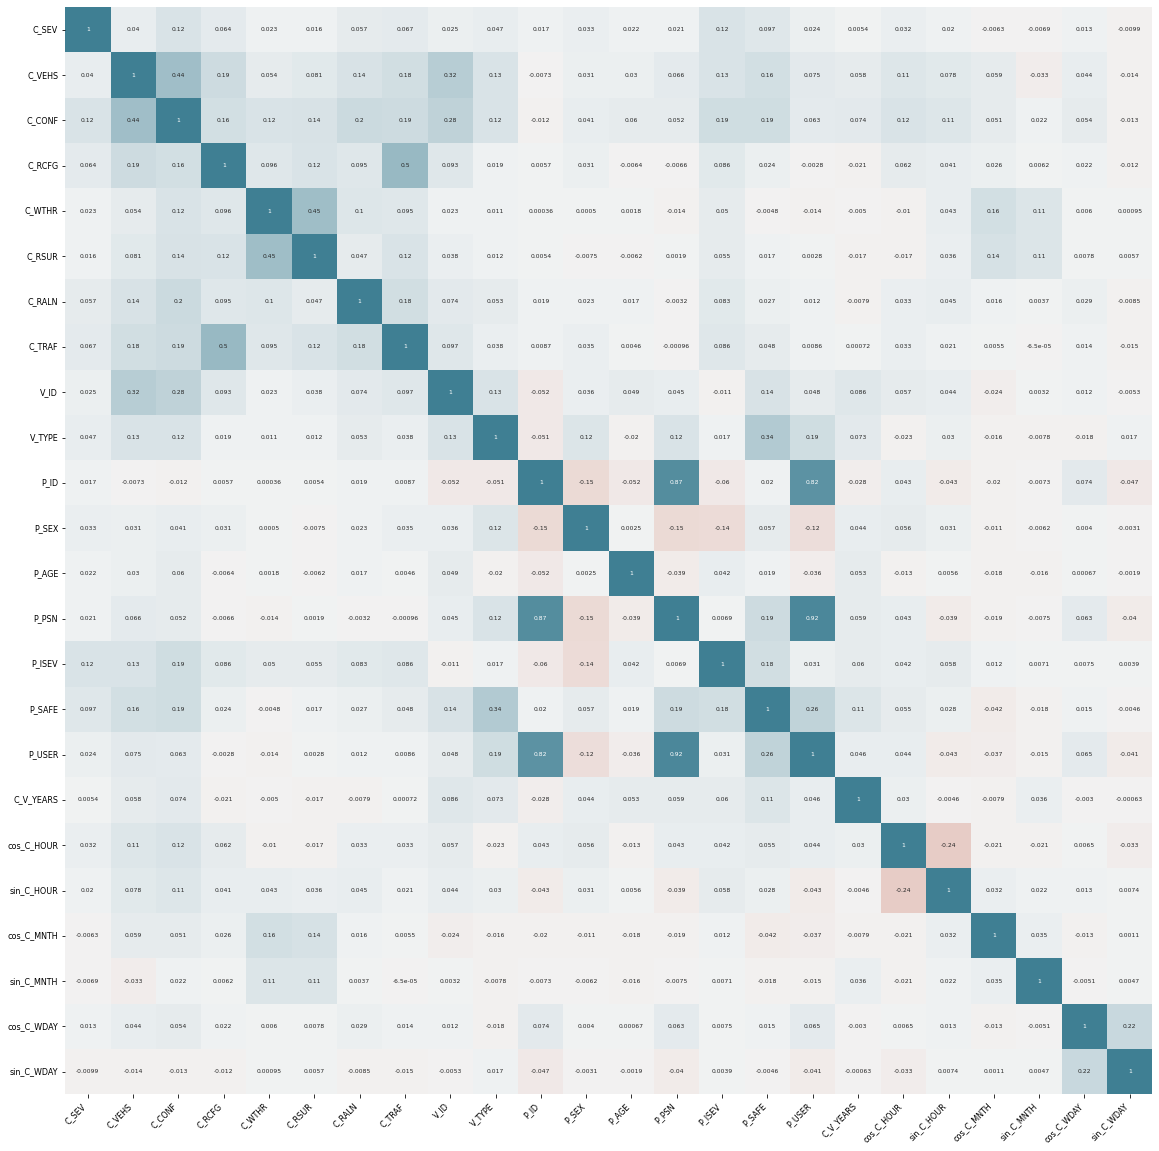

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

Una vez calculadas la matriz de correlaciones, podemos observar que nuestra variable objetivo (C_SEV) mantiene una correlación positiva no muy elevada con todas las variables, excepto con las temporales (mes y día de la semana). Por otro lado destacamos una correlación más positiva con las variables P_ISEV (básicamente aporta la misma información como el número de fallecidos) y la variable C_CONF, que indica la configuración de la carretera donde se produce el accidente.

Las más correlacionadas son  el tipo de vehículo y la configuración de la carretera, pues no todos los vehículos, circulan por el mismo tipo de vías. Hay que destacar también la relación existente entre las variables temporales (seno y coseno).

Las variables posición del coche (P_PSN) y el usuario del vehículo (P_USER), están positivamente correlacionados, pues básicamente aportan la misma información (conductor, motorista, ciclista...).

Por último el sexo del conductor y el grado de severidad del accidente se correlacionan positivamente, por lo que los hombres estadísticamente mueren más que las mujeres, o la posición que ocupaba en el coche.

# Separación en train y test

In [81]:
from sklearn.model_selection import train_test_split

collision_xtrain, collision_xtest, collision_ytrain, collision_ytest = train_test_split(collision_df.drop('C_SEV',axis=1),
                                                                                       collision_df['C_SEV'],
                                                                                       test_size = 0.3,
                                                                                       random_state = 1234)
collision_train = pd.concat([collision_xtrain, collision_ytrain], axis = 1)
collision_test = pd.concat([collision_xtest, collision_ytest], axis = 1)

In [82]:
collision_xtrain.isna().sum()

C_VEHS            0
C_CONF            0
C_RCFG            0
C_WTHR            0
C_RSUR            0
C_RALN            0
C_TRAF            0
V_ID              0
V_TYPE            0
P_ID              0
P_SEX             0
P_AGE             0
P_PSN             0
P_ISEV            0
P_SAFE            0
P_USER            0
C_V_YEARS         0
cos_C_HOUR    27809
sin_C_HOUR    27809
cos_C_MNTH        0
sin_C_MNTH        0
cos_C_WDAY      436
sin_C_WDAY      436
dtype: int64

## Tratamiento de NA`s del set de Train

### Variable sin_C_WDAY y cos_C_WDAY

In [83]:
collision_train['sin_C_WDAY']=collision_train['sin_C_WDAY'].fillna((collision_train['sin_C_WDAY'].mode()[0]))

In [84]:
collision_train['cos_C_WDAY']=collision_train['cos_C_WDAY'].fillna((collision_train['cos_C_WDAY'].mode()[0]))

### Variables sin_C_HOUR y sin_C_HOUR

Al existir diferencias entre los días laborables y no laborables, imputaremos los valores nulos, en función de la moda horaria, de cada día de la semana.

In [85]:
collision_train['sin_C_HOUR']= collision_train['sin_C_HOUR'].groupby(collision_train["sin_C_WDAY"]).fillna((collision_train['sin_C_HOUR'].mode()[0]))

In [86]:
collision_train['cos_C_HOUR']= collision_train['cos_C_HOUR'].groupby(collision_train["cos_C_WDAY"]).fillna((collision_train['cos_C_HOUR'].mode()[0]))

In [87]:
collision_train.isna().sum()

C_VEHS        0
C_CONF        0
C_RCFG        0
C_WTHR        0
C_RSUR        0
C_RALN        0
C_TRAF        0
V_ID          0
V_TYPE        0
P_ID          0
P_SEX         0
P_AGE         0
P_PSN         0
P_ISEV        0
P_SAFE        0
P_USER        0
C_V_YEARS     0
cos_C_HOUR    0
sin_C_HOUR    0
cos_C_MNTH    0
sin_C_MNTH    0
cos_C_WDAY    0
sin_C_WDAY    0
C_SEV         0
dtype: int64

## Tratamiento de NA`s del set de Test

Se imputarán los valores nulos de estas variables en función de la moda del set de train.

### Variable sin_C_WDAY y cos_C_WDAY

In [88]:
collision_test['sin_C_WDAY']=collision_test['sin_C_WDAY'].fillna((collision_train['sin_C_WDAY'].mode()[0]))

In [89]:
collision_test['cos_C_WDAY']=collision_test['cos_C_WDAY'].fillna((collision_train['cos_C_WDAY'].mode()[0]))

### Variables sin_C_HOUR y sin_C_HOUR

Al igual que hicimos con el train, se imputarán los valores nulos de las horas por la moda en función del día de la semana.

In [90]:
collision_test['cos_C_HOUR']= collision_test['cos_C_HOUR'].groupby(collision_test["cos_C_WDAY"]).fillna((collision_train['cos_C_HOUR'].mode()[0]))

In [91]:
collision_test['sin_C_HOUR']= collision_test['sin_C_HOUR'].groupby(collision_test["sin_C_WDAY"]).fillna((collision_train['sin_C_HOUR'].mode()[0]))

In [92]:
collision_test.isnull().sum()

C_VEHS        0
C_CONF        0
C_RCFG        0
C_WTHR        0
C_RSUR        0
C_RALN        0
C_TRAF        0
V_ID          0
V_TYPE        0
P_ID          0
P_SEX         0
P_AGE         0
P_PSN         0
P_ISEV        0
P_SAFE        0
P_USER        0
C_V_YEARS     0
cos_C_HOUR    0
sin_C_HOUR    0
cos_C_MNTH    0
sin_C_MNTH    0
cos_C_WDAY    0
sin_C_WDAY    0
C_SEV         0
dtype: int64

Una vez imputados los valores nulos, podemos volver a dividir el set en x e y train.

In [93]:
collision_xtrain= collision_train.drop('C_SEV',axis=1)
collision_ytrain= collision_train['C_SEV']

In [94]:
collision_xtest= collision_test.drop('C_SEV',axis=1)
collision_ytest= collision_test['C_SEV']

In [95]:
collision_xtest.isna().sum()

C_VEHS        0
C_CONF        0
C_RCFG        0
C_WTHR        0
C_RSUR        0
C_RALN        0
C_TRAF        0
V_ID          0
V_TYPE        0
P_ID          0
P_SEX         0
P_AGE         0
P_PSN         0
P_ISEV        0
P_SAFE        0
P_USER        0
C_V_YEARS     0
cos_C_HOUR    0
sin_C_HOUR    0
cos_C_MNTH    0
sin_C_MNTH    0
cos_C_WDAY    0
sin_C_WDAY    0
dtype: int64

## Escalado de variables

Una vez imputados los valores nulos y dividir en train y test, podemos proceder el escalado de variables.

In [96]:
# Primero, debemos escalar las variables
scaler = StandardScaler()
model_scaled = scaler.fit(collision_xtrain)
collision_xtrain_scaled = pd.DataFrame(scaler.transform(collision_xtrain), columns = collision_xtrain.columns, index = collision_xtrain.index)
collision_xtest_scaled = pd.DataFrame(scaler.transform(collision_xtest), columns = collision_xtest.columns, index = collision_xtest.index)

In [97]:
collision_xtrain_scaled.describe()

C_VEHS        C_CONF        C_RCFG        C_WTHR        C_RSUR  \
count  3.127522e+06  3.127522e+06  3.127522e+06  3.127522e+06  3.127522e+06   
mean   1.169351e-15  8.799737e-15  3.186187e-15  5.128818e-17  2.177876e-14   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.360651e+00 -6.187153e-01 -1.333227e+00 -1.923770e+00 -4.862255e+00   
25%   -3.039712e-01 -6.187153e-01 -7.995036e-01 -2.171304e-01  5.857809e-02   
50%   -2.449823e-01 -1.440007e-01 -7.995036e-01 -2.171304e-01  5.857809e-02   
75%   -2.449823e-01  5.629769e-02  1.254134e+00 -2.171304e-01  5.857809e-02   
max    8.089404e+01  4.647723e+00  1.099991e+01  6.336016e+00  1.625970e+01   

             C_RALN        C_TRAF          V_ID        V_TYPE          P_ID  \
count  3.127522e+06  3.127522e+06  3.127522e+06  3.127522e+06  3.127522e+06   
mean  -1.198741e-14  3.008530e-15 -3.654735e-15 -1.031861e-14  2.298530e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.239157e+00 -1.900513e+00 -2.404828e+00 -1.804347e+00 -3.879836e+00   
25%   -3.428947e-01 -1.348549e+00 -5.107249e-01 -2.757335e-01 -2.852974e-01   
50%   -3.428947e-01  8.446490e-01  2.021813e-01 -2.757335e-01 -2.852974e-01   
75%   -3.428947e-01  8.446490e-01  3.697337e-01 -2.757335e-01  4.170955e-02   
max    2.889088e+00  9.313774e+00  1.097511e+02  7.300817e+00  3.633498e+01   

       ...        P_ISEV        P_SAFE        P_USER     C_V_YEARS  \
count  ...  3.127522e+06  3.127522e+06  3.127522e+06  3.127522e+06   
mean   ...  1.160161e-14  6.864480e-15 -1.183607e-14  2.039169e-15   
std    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    ... -1.086287e-01 -1.130095e+00 -1.771753e+00 -1.826782e-01   
25%    ... -1.086287e-01 -2.661620e-01 -5.598387e-01 -1.656933e-01   
50%    ... -6.451945e-02 -2.661620e-01 -5.598387e-01 -1.521054e-01   
75%    ... -6.451945e-02 -2.661620e-01  6.085779e-01 -1.385175e-01   
max    ...  1.205845e+01  4.756085e+00  5.245757e+00  6.665623e+00   

         cos_C_HOUR    sin_C_HOUR    cos_C_MNTH    sin_C_MNTH    cos_C_WDAY  \
count  3.127522e+06  3.127522e+06  3.127522e+06  3.127522e+06  3.127522e+06   
mean   7.090628e-16 -6.119562e-16  5.986573e-15 -2.921975e-15 -4.610424e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.168020e+00 -1.049782e+00 -1.405833e+00 -1.368613e+00 -1.259972e+00   
25%   -8.342639e-01 -8.833694e-01 -1.219321e+00 -1.175516e+00 -1.259972e+00   
50%   -1.498572e-01 -3.250896e-01 -1.368604e-02  7.268615e-02 -2.795025e-01   
75%    6.859280e-01  6.689126e-01  1.191949e+00  7.933359e-01  9.431225e-01   
max    1.922591e+00  1.974798e+00  1.378461e+00  1.513986e+00  1.487242e+00   

         sin_C_WDAY  
count  3.127522e+06  
mean  -1.840467e-15  
std    1.000000e+00  
min   -1.288317e+00  
25%   -1.020042e+00  
50%    6.617957e-02  
75%    1.152401e+00  
max    1.420676e+00  

[8 rows x 23 columns]

 <ul>
A continuación, eliminaremos las siguientes variables:
<li> P_ISEV: Esta variable informa sobre el grado de daño causado por el accidente, que aportará información a posteriori del accidente.</li>
<li> P_ID: No es información relevante para el modelo</li>
<li> V_ID: No es información relevante para el modelo</li> 
</ul>

In [98]:
collision_xtrain_scaled= collision_xtrain_scaled.drop('P_ISEV',axis=1)
collision_xtest_scaled= collision_xtest_scaled.drop('P_ISEV',axis=1)

In [99]:
collision_xtrain_scaled= collision_xtrain_scaled.drop('P_ID',axis=1)
collision_xtest_scaled= collision_xtest_scaled.drop('P_ID',axis=1)

In [100]:
collision_xtrain_scaled= collision_xtrain_scaled.drop('V_ID',axis=1)
collision_xtest_scaled= collision_xtest_scaled.drop('V_ID',axis=1)

# Oversampling

Como se ha observado a lo largo de todo el análisis, se observa un número muy pequeño de valores tipo 1 (fallecidos) respecto a los 0. Esto va a hacer que el modelo entrene de manera errónea, por lo que llevaremos a cabo un oversampling. Esto generará filas con valores 1, para equilibrar el dataset y entrenar correctamente el modelo.

In [101]:
print("Before oversampling: ",Counter(collision_ytrain))

Before oversampling:  Counter({0: 3075704, 1: 51818})


In [102]:
SMOTE = SMOTE(random_state=42, sampling_strategy=0.3)

In [103]:
collision_xtrain_SMOTE, collision_ytrain_SMOTE  = SMOTE.fit_resample(collision_xtrain_scaled,collision_ytrain)

In [104]:
print("After oversampling: ",Counter(collision_ytrain_SMOTE))

After oversampling:  Counter({0: 3075704, 1: 922711})


# Guardamos los datos

Guardamos los datos generados a lo largo del análisis, para la producción de los modelos.

In [106]:
collision_xtrain_SMOTE.to_csv('collision_xtrain_SMOTE.csv',header=True, index=False)

In [107]:
collision_ytrain_SMOTE.to_csv('collision_ytrain_SMOTE.csv',header=True, index=False)

In [108]:
collision_xtest_scaled.to_csv('collision_xtest_SMOTE.csv',header=True, index=False)

In [109]:
collision_ytest.to_csv('collision_ytest_SMOTE.csv',header=True, index=False)